In [1]:
savepath = 'scatter/qdiff'

# import packages
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import netCDF4 as nc
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr

# functions
def find_nearest(array, value): # finds closest value
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

-76.23241424560547
139.83184814453125
-137.10272216796875
89.95383333333332


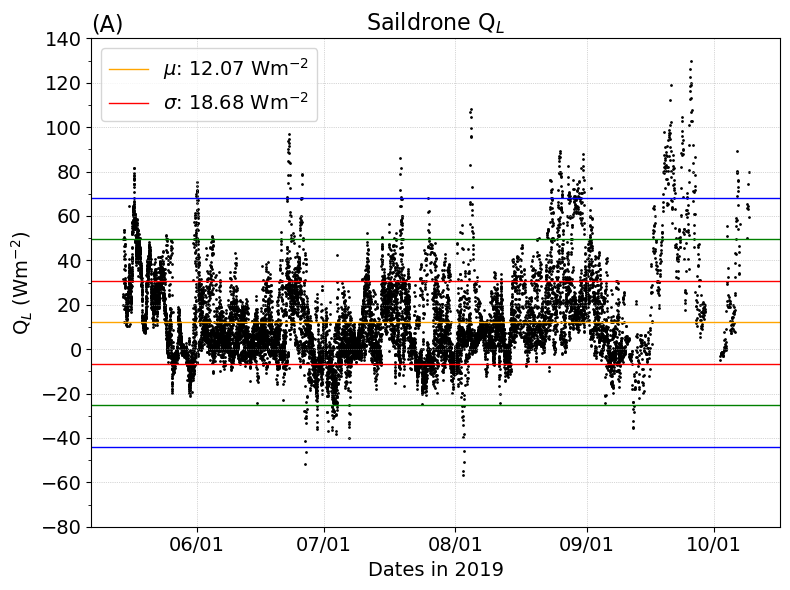

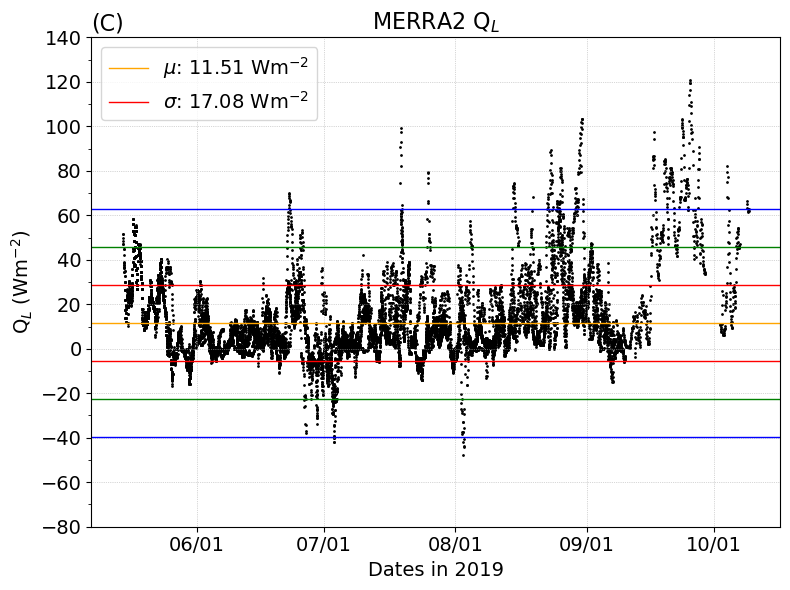

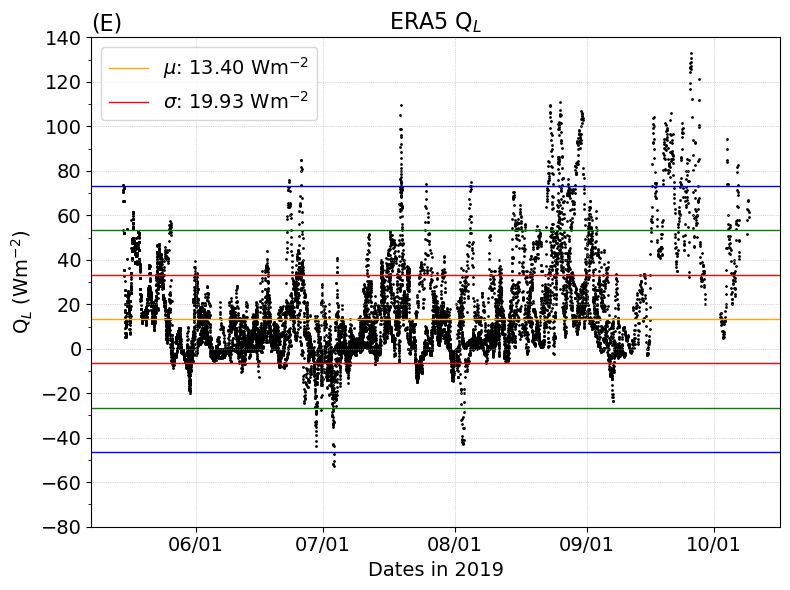

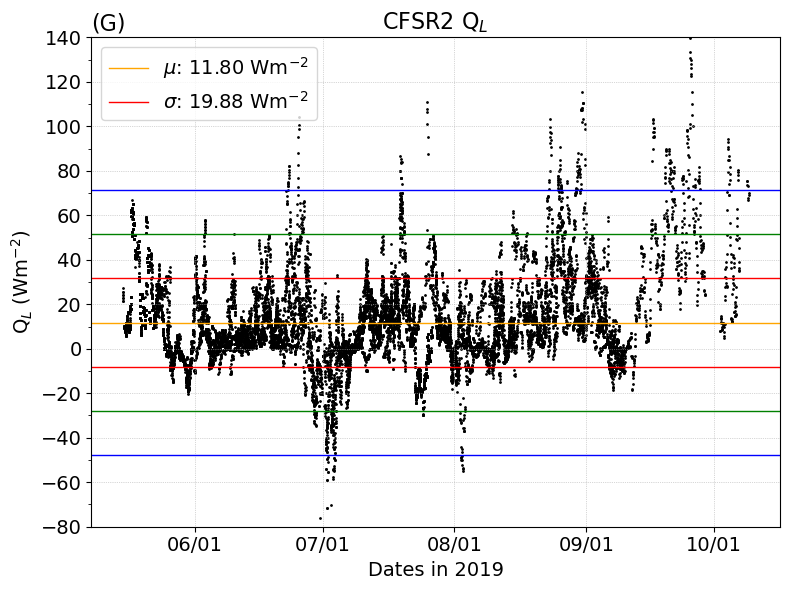

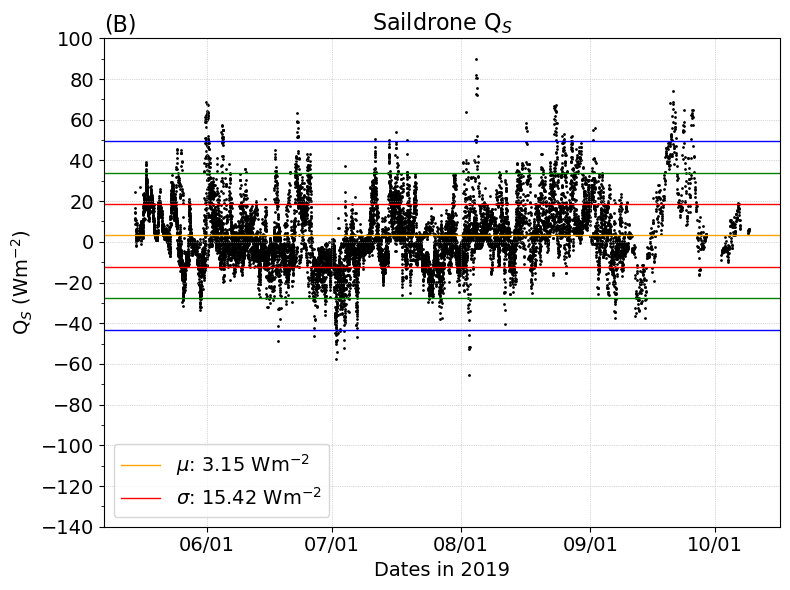

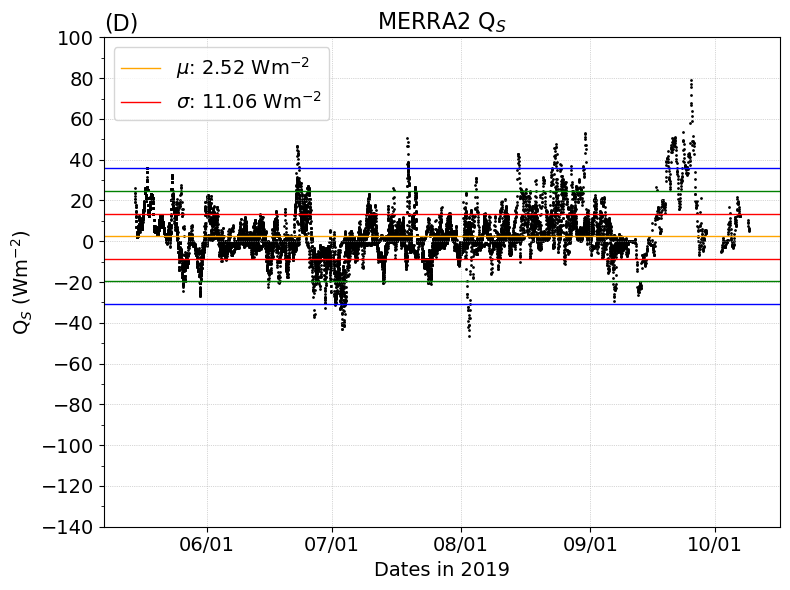

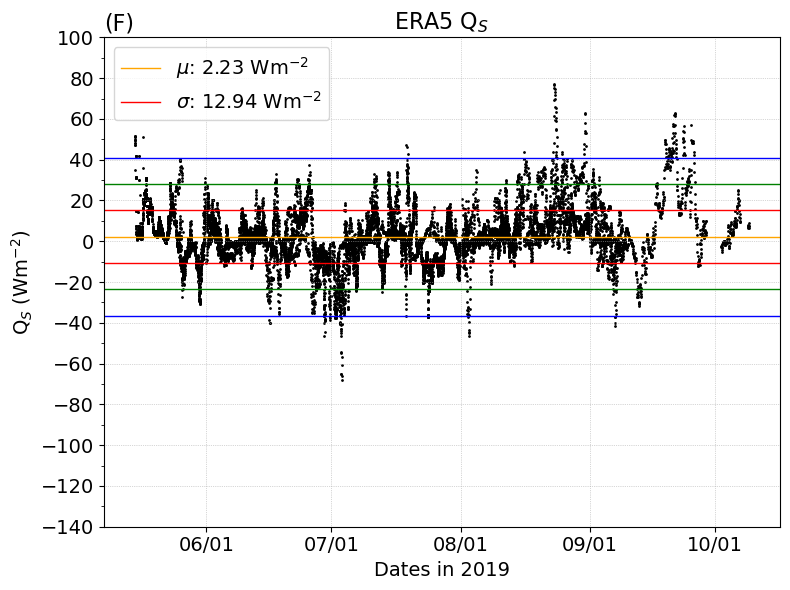

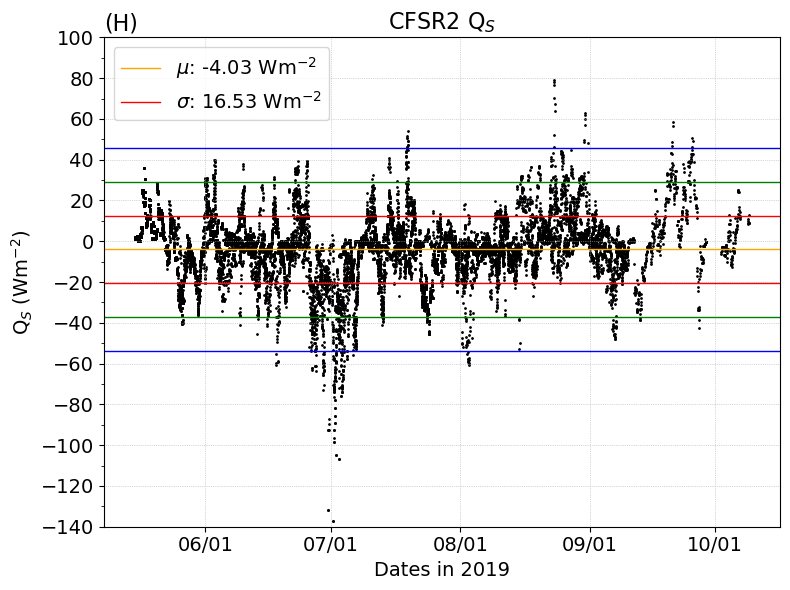

In [2]:
# 2019 flux
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QLm = m['QL']
QSm = m['QS']

ts_m = []
QLs_m = []
QSs_m = []
for t in tm:
    k = find_nearest(t0,t)
    ts_m.append(t0[k])
    QLs_m.append(QL0[k])
    QSs_m.append(QS0[k])

ts_m = pd.to_datetime(ts_m,unit='s')
tm = pd.to_datetime(tm,unit='s')

s0_e = pd.read_csv('data/e5/sd-for-e5-2019.csv')
e = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_e['datetime']
QL0 = s0_e['QL']
QS0 = s0_e['QS']

te = e['datetime']
QLe = e['QL']
QSe = e['QS']

ts_e = []
QLs_e = []
QSs_e = []
for t in te:
    k = find_nearest(t0,t)
    ts_e.append(t0[k])
    QLs_e.append(QL0[k])
    QSs_e.append(QS0[k])

ts_e = pd.to_datetime(ts_e,unit='s')
te = pd.to_datetime(te,unit='s')

s0_c = pd.read_csv('data/c2/sd-for-c2-2019.csv')
c = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_c['datetime']
QL0 = s0_c['QL']
QS0 = s0_c['QS']

tc = c['datetime']
QLc = c['QL']
QSc = c['QS']

ts_c = []
QLs_c = []
QSs_c = []
for t in tc:
    k = find_nearest(t0,t)
    ts_c.append(t0[k])
    QLs_c.append(QL0[k])
    QSs_c.append(QS0[k])

ts_c = pd.to_datetime(ts_c,unit='s')
tc = pd.to_datetime(tc,unit='s')

s = pd.read_csv('data/sd/avg-at30-2019.csv')
s['datetime'] = pd.to_datetime(s['datetime'], unit='s', origin='unix')
ts = s['datetime']
QLs = s['QL']
QSs = s['QS']

print(np.min([np.min(QLs),np.min(QLc),np.min(QLm),np.min(QLe)]))
print(np.max([np.max(QLs),np.max(QLc),np.max(QLm),np.max(QLe)]))

print(np.min([np.min(QSs),np.min(QSc),np.min(QSm),np.min(QSe)]))
print(np.max([np.max(QSs),np.max(QSc),np.max(QSm),np.max(QSe)]))

# QL 2019
# Set min and max values for y-axis
plot_min = -80
plot_max = 140

# saildrone
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(ts, QLs, s=1, c='k')
meanQL = np.mean(QLs)
stdQL = np.std(QLs)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(A)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('Saildrone Q$_L$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
plt.legend(prop = { "size": 14 })
filepath = savepath+'/2019/A-flux.png'
plt.savefig(filepath)

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QLm, s=1, c='k')
meanQL = np.mean(QLm)
stdQL = np.std(QLm)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(C)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('MERRA2 Q$_L$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
plt.legend(prop = { "size": 14 })
filepath = savepath+'/2019/C-flux.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QLe, s=1, c='k')
meanQL = np.mean(QLe)
stdQL = np.std(QLe)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(E)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('ERA5 Q$_L$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
plt.legend(prop = { "size": 14 })
filepath = savepath+'/2019/E-flux.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QLc, s=1, c='k')
meanQL = np.mean(QLc)
stdQL = np.std(QLc)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(G)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('CFSR2 Q$_L$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
plt.legend(prop = { "size": 14 })
filepath = savepath+'/2019/G-flux.png'
plt.savefig(filepath)

# QS 2019
# Set min and max values for y-axis
plot_min = -140
plot_max = 90

# saildrone
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(ts, QSs, s=1, c='k')
meanQS = np.mean(QSs)
stdQS = np.std(QSs)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(B)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('Saildrone Q$_S$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
plt.legend(prop = { "size": 14 })
filepath = savepath+'/2019/B-flux.png'
plt.savefig(filepath)

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QSm, s=1, c='k')
meanQS = np.mean(QSm)
stdQS = np.std(QSm)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(D)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('MERRA2 Q$_S$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
plt.legend(prop = { "size": 14 })
filepath = savepath+'/2019/D-flux.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QSe, s=1, c='k')
meanQS = np.mean(QSe)
stdQS = np.std(QSe)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(F)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('ERA5 Q$_S$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
plt.legend(prop = { "size": 14 })
filepath = savepath+'/2019/F-flux.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QSc, s=1, c='k')
meanQS = np.mean(QSc)
stdQS = np.std(QSc)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(H)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('CFSR2 Q$_S$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
plt.legend(prop = { "size": 14 })
filepath = savepath+'/2019/H-flux.png'
plt.savefig(filepath)

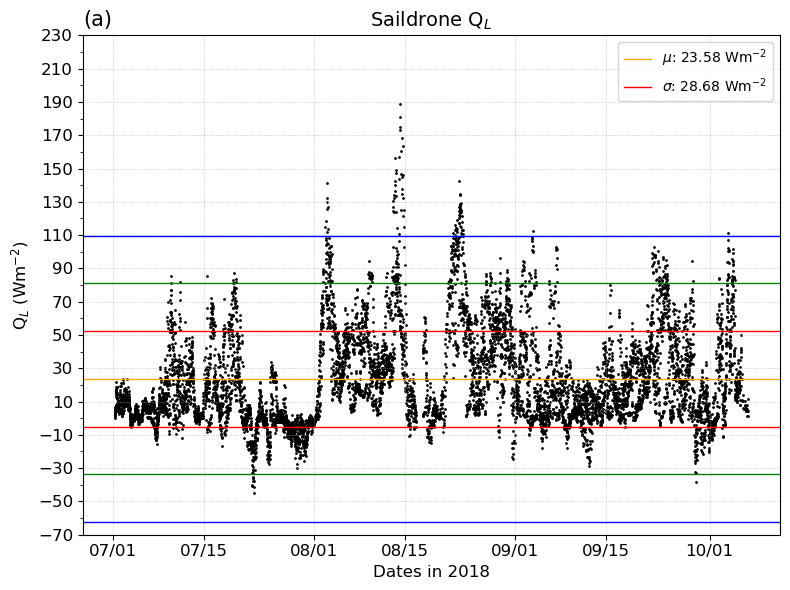

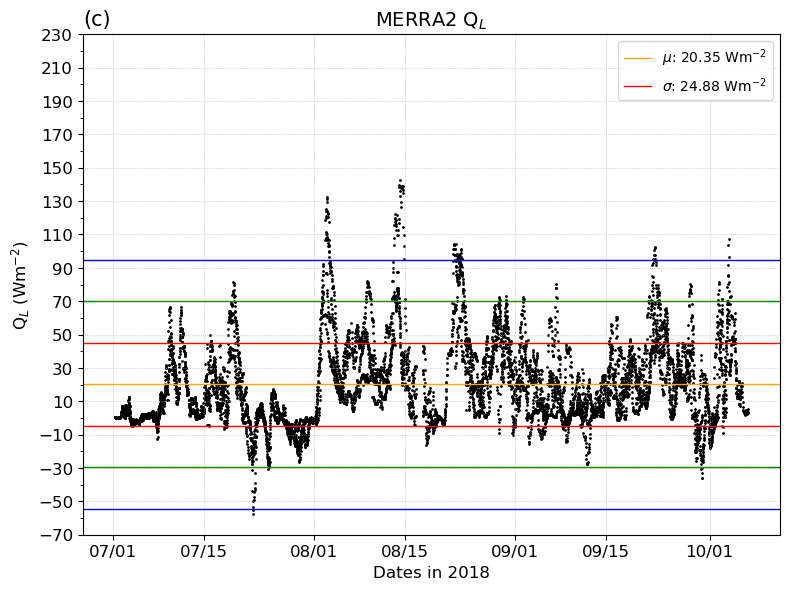

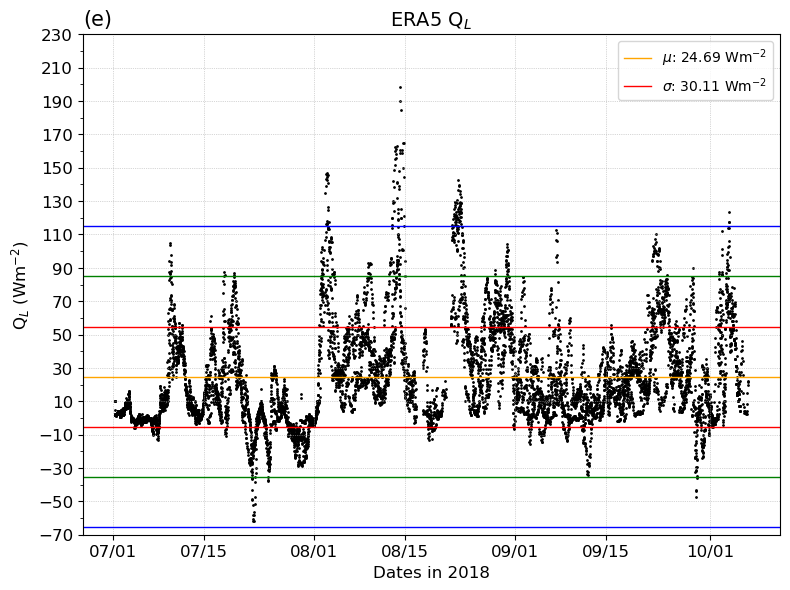

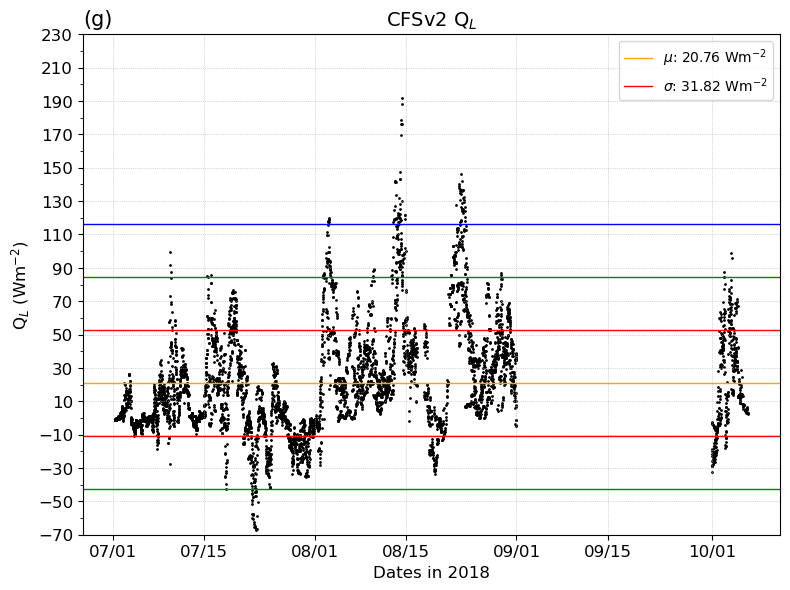

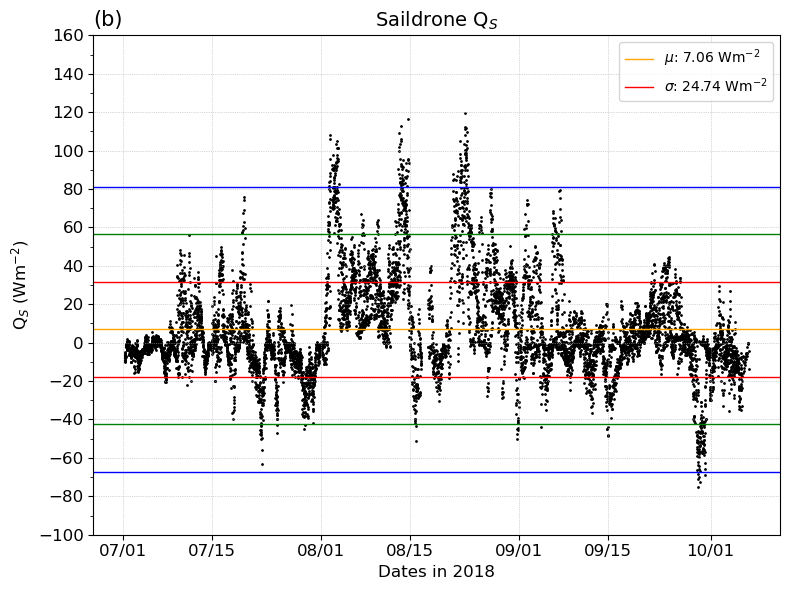

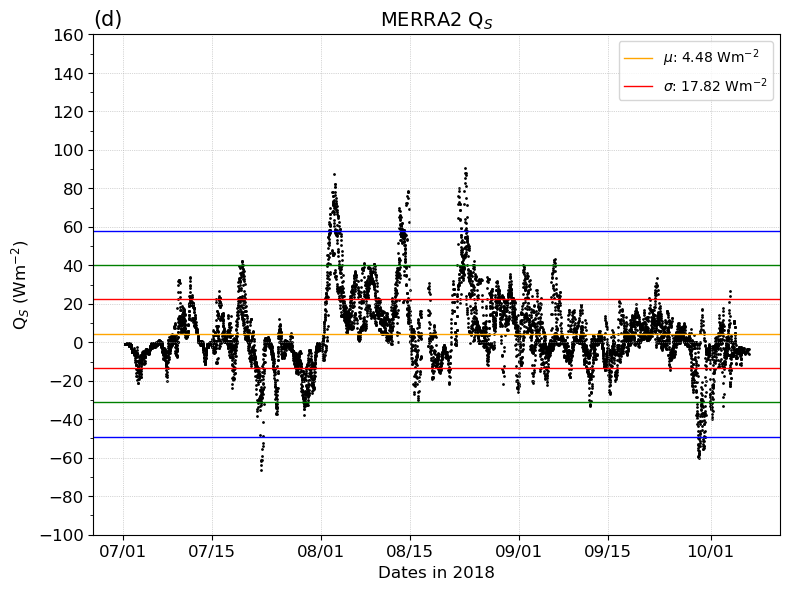

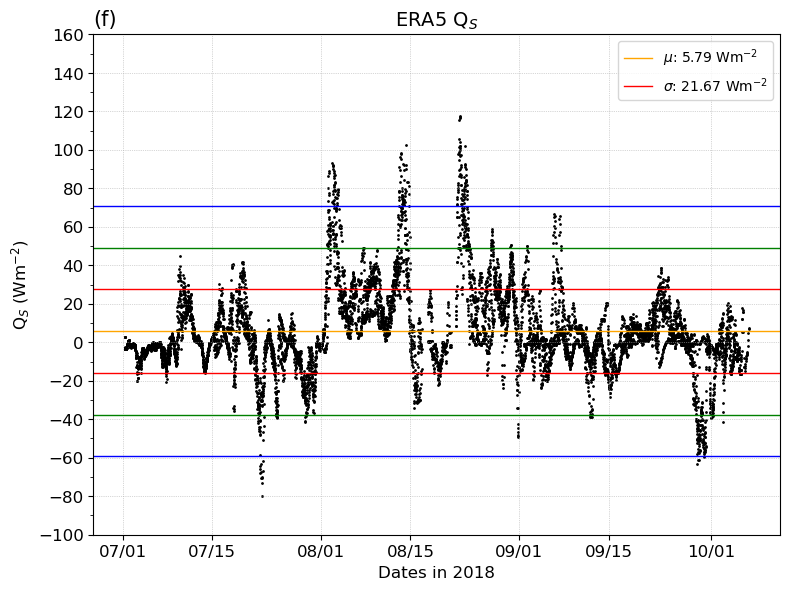

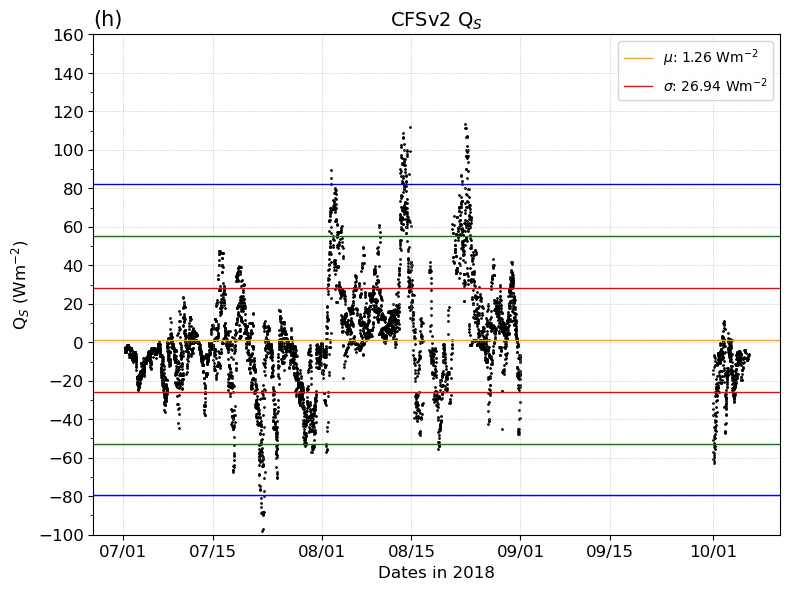

In [13]:
# 2018 flux
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2018.csv')
m = pd.read_csv('data/m2/m2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QLm = m['QL']
QSm = m['QS']

ts_m = []
QLs_m = []
QSs_m = []
for t in tm:
    k = find_nearest(t0,t)
    ts_m.append(t0[k])
    QLs_m.append(QL0[k])
    QSs_m.append(QS0[k])

ts_m = pd.to_datetime(ts_m,unit='s')
tm = pd.to_datetime(tm,unit='s')

s0_e = pd.read_csv('data/e5/sd-for-e5-2018.csv')
e = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_e['datetime']
QL0 = s0_e['QL']
QS0 = s0_e['QS']

te = e['datetime']
QLe = e['QL']
QSe = e['QS']

ts_e = []
QLs_e = []
QSs_e = []
for t in te:
    k = find_nearest(t0,t)
    ts_e.append(t0[k])
    QLs_e.append(QL0[k])
    QSs_e.append(QS0[k])

ts_e = pd.to_datetime(ts_e,unit='s')
te = pd.to_datetime(te,unit='s')

s0_c = pd.read_csv('data/c2/sd-for-c2-2018.csv')
c = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_c['datetime']
QL0 = s0_c['QL']
QS0 = s0_c['QS']

tc = c['datetime']
QLc = c['QL']
QSc = c['QS']

ts_c = []
QLs_c = []
QSs_c = []
for t in tc:
    k = find_nearest(t0,t)
    ts_c.append(t0[k])
    QLs_c.append(QL0[k])
    QSs_c.append(QS0[k])

ts_c = pd.to_datetime(ts_c,unit='s')
tc = pd.to_datetime(tc,unit='s')

s = pd.read_csv('data/sd/avg-at30-2018.csv')
s['datetime'] = pd.to_datetime(s['datetime'], unit='s', origin='unix')
ts = s['datetime']
QLs = s['QL']
QSs = s['QS']

# QL 2018
# Set min and max values for y-axis
plot_min = -70
plot_max = 230

# saildrone
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(ts, QLs, s=1, c='k')
meanQL = np.mean(QLs)
stdQL = np.std(QLs)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(a)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('Saildrone Q$_L$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2018/A-flux.png'
plt.savefig(filepath)

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QLm, s=1, c='k')
meanQL = np.mean(QLm)
stdQL = np.std(QLm)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(c)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('MERRA2 Q$_L$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2018/C-flux.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QLe, s=1, c='k')
meanQL = np.mean(QLe)
stdQL = np.std(QLe)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(e)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('ERA5 Q$_L$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2018/E-flux.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QLc, s=1, c='k')
meanQL = np.mean(QLc)
stdQL = np.std(QLc)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(g)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('CFSR2 Q$_L$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2018/G-flux.png'
plt.savefig(filepath)

# QS 2018
# Set min and max values for y-axis
plot_min = -100
plot_max = 150

# saildrone
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(ts, QSs, s=1, c='k')
meanQS = np.mean(QSs)
stdQS = np.std(QSs)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(b)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('Saildrone Q$_S$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2018/B-flux.png'
plt.savefig(filepath)

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QSm, s=1, c='k')
meanQS = np.mean(QSm)
stdQS = np.std(QSm)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(d)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('MERRA2 Q$_S$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2018/D-flux.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QSe, s=1, c='k')
meanQS = np.mean(QSe)
stdQS = np.std(QSe)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(f)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('ERA5 Q$_S$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2018/F-flux.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QSc, s=1, c='k')
meanQS = np.mean(QSc)
stdQS = np.std(QSc)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(h)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('CFSR2 Q$_S$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2018/H-flux.png'
plt.savefig(filepath)

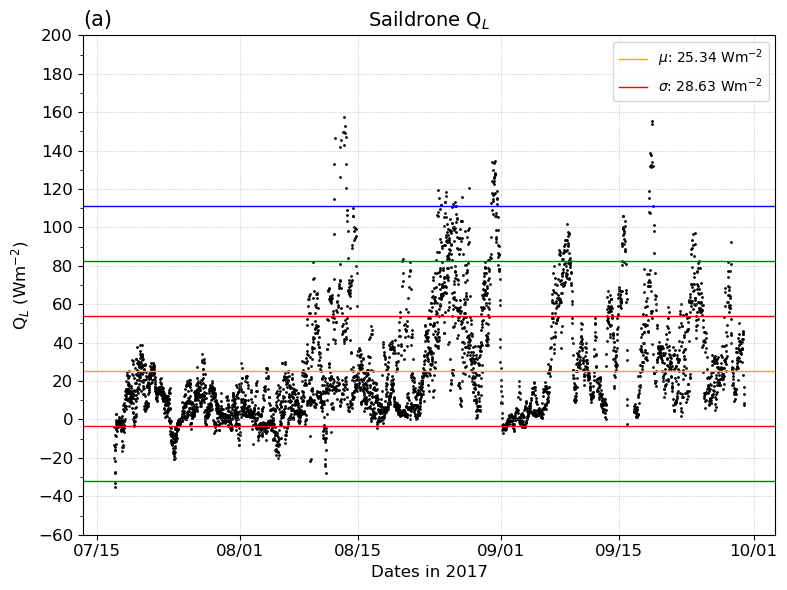

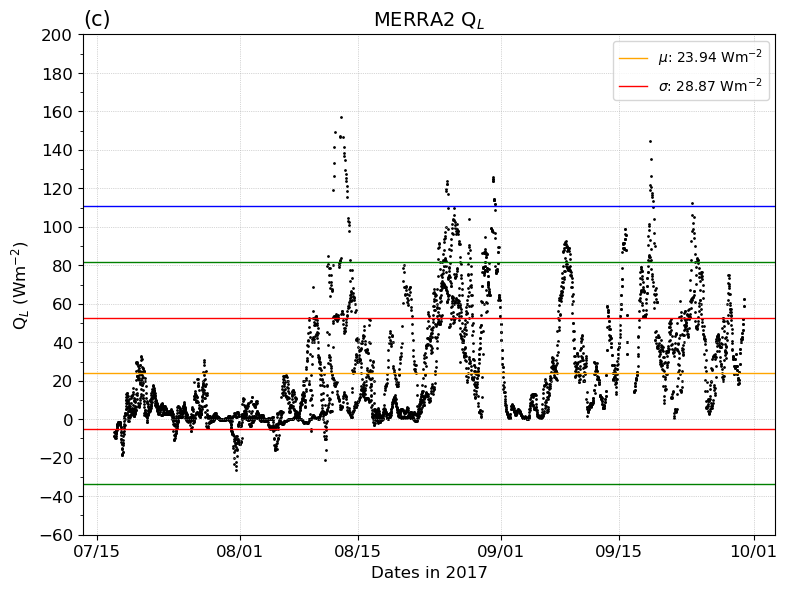

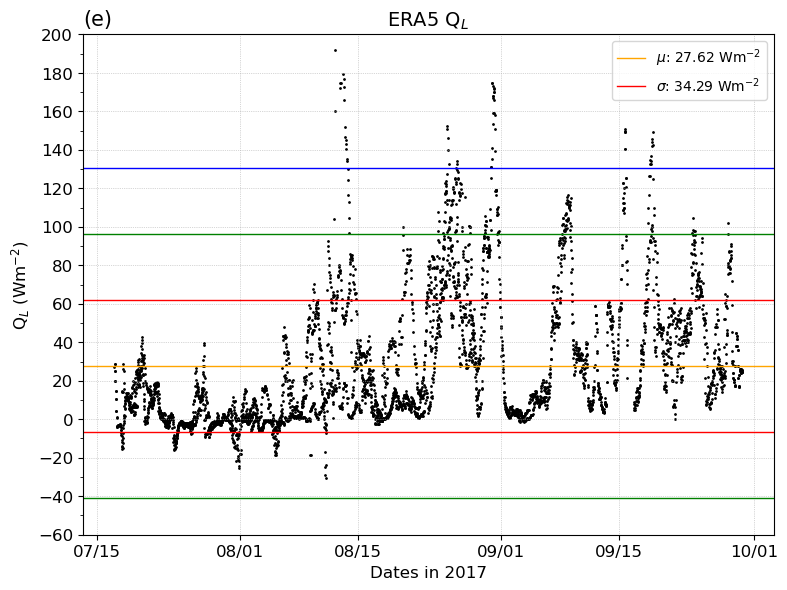

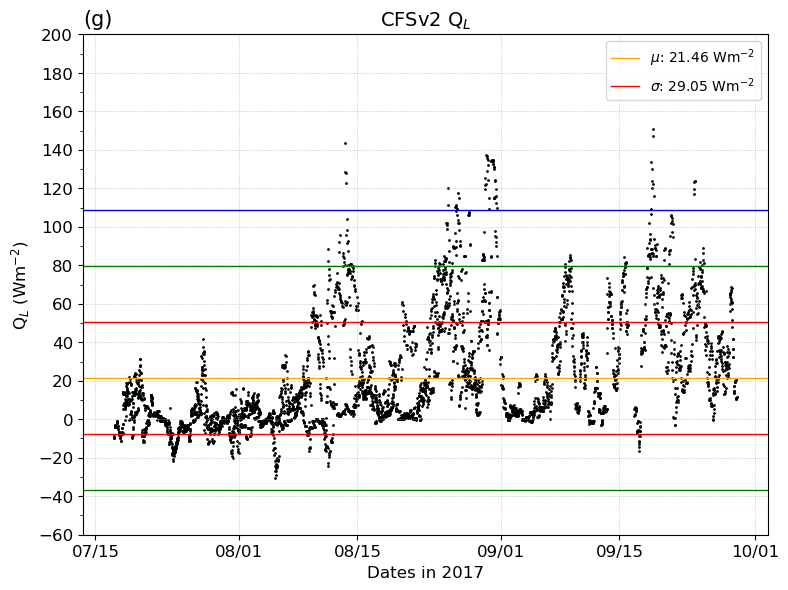

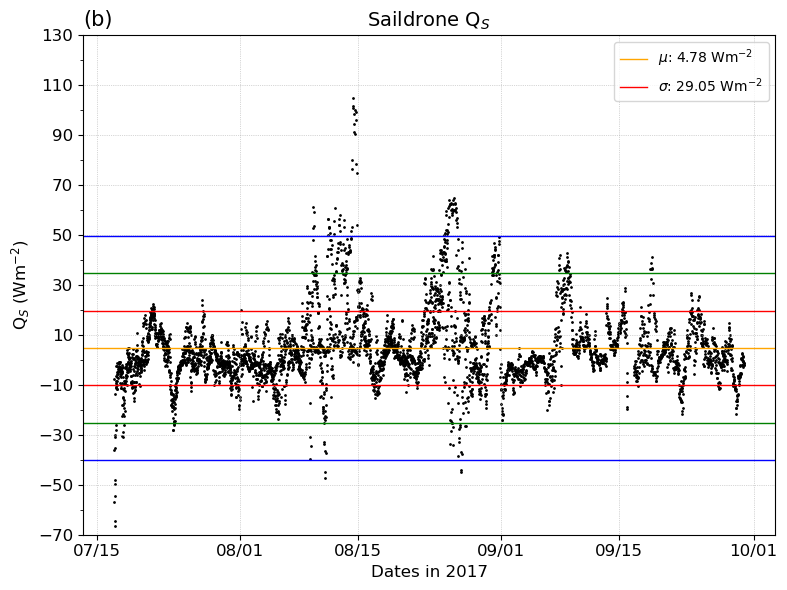

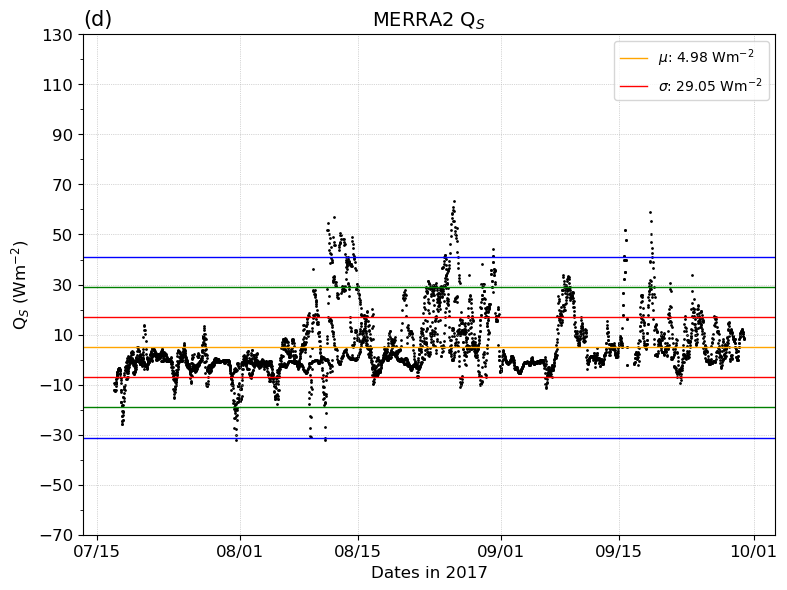

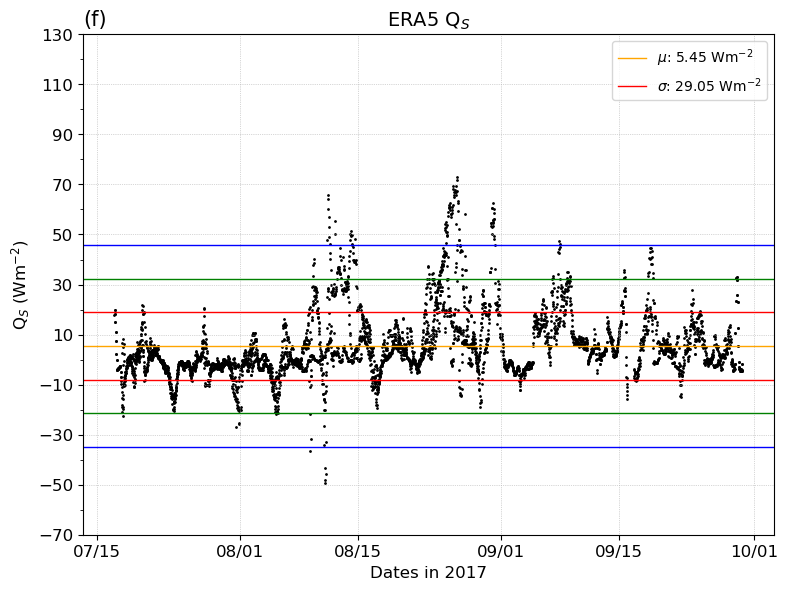

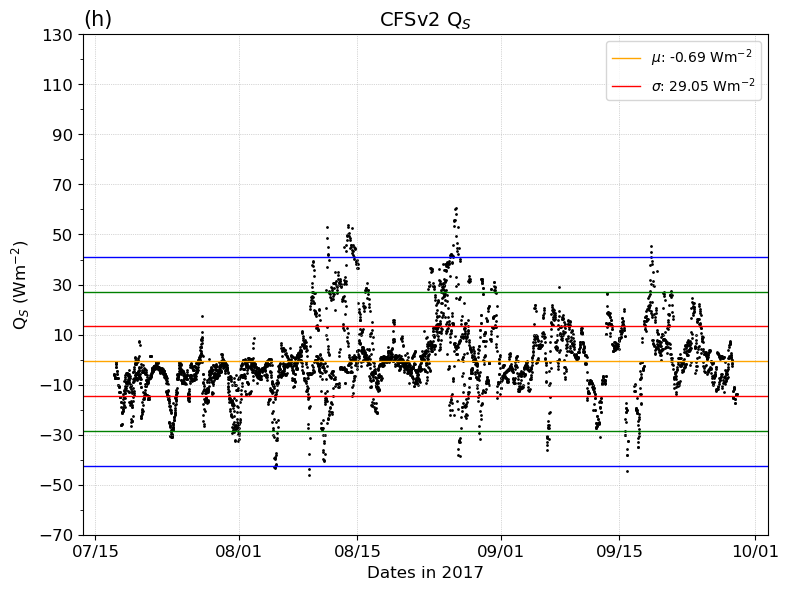

In [15]:
# 2017 flux
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QLm = m['QL']
QSm = m['QS']

ts_m = []
QLs_m = []
QSs_m = []
for t in tm:
    k = find_nearest(t0,t)
    ts_m.append(t0[k])
    QLs_m.append(QL0[k])
    QSs_m.append(QS0[k])

ts_m = pd.to_datetime(ts_m,unit='s')
tm = pd.to_datetime(tm,unit='s')

s0_e = pd.read_csv('data/e5/sd-for-e5-2017.csv')
e = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_e['datetime']
QL0 = s0_e['QL']
QS0 = s0_e['QS']

te = e['datetime']
QLe = e['QL']
QSe = e['QS']

ts_e = []
QLs_e = []
QSs_e = []
for t in te:
    k = find_nearest(t0,t)
    ts_e.append(t0[k])
    QLs_e.append(QL0[k])
    QSs_e.append(QS0[k])

ts_e = pd.to_datetime(ts_e,unit='s')
te = pd.to_datetime(te,unit='s')

s0_c = pd.read_csv('data/c2/sd-for-c2-2017.csv')
c = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_c['datetime']
QL0 = s0_c['QL']
QS0 = s0_c['QS']

tc = c['datetime']
QLc = c['QL']
QSc = c['QS']

ts_c = []
QLs_c = []
QSs_c = []
for t in tc:
    k = find_nearest(t0,t)
    ts_c.append(t0[k])
    QLs_c.append(QL0[k])
    QSs_c.append(QS0[k])

ts_c = pd.to_datetime(ts_c,unit='s')
tc = pd.to_datetime(tc,unit='s')

s = pd.read_csv('data/sd/avg-at30-2017.csv')
s['datetime'] = pd.to_datetime(s['datetime'], unit='s', origin='unix')
ts = s['datetime']
QLs = s['QL']
QSs = s['QS']

# QL 2017
# Set min and max values for y-axis
plot_min = -60
plot_max = 200

# saildrone
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(ts, QLs, s=1, c='k')
meanQL = np.mean(QLs)
stdQL = np.std(QLs)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(a)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('Saildrone Q$_L$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2017/A-flux.png'
plt.savefig(filepath)

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QLm, s=1, c='k')
meanQL = np.mean(QLm)
stdQL = np.std(QLm)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(c)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('MERRA2 Q$_L$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2017/C-flux.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QLe, s=1, c='k')
meanQL = np.mean(QLe)
stdQL = np.std(QLe)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(e)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('ERA5 Q$_L$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2017/E-flux.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QLc, s=1, c='k')
meanQL = np.mean(QLc)
stdQL = np.std(QLc)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel =  "$\sigma$: " + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(g)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('CFSR2 Q$_L$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2017/G-flux.png'
plt.savefig(filepath)

# QS 2017
# Set min and max values for y-axis
plot_min = -70
plot_max = 130

# saildrone
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(ts, QSs, s=1, c='k')
meanQS = np.mean(QSs)
stdQS = np.std(QSs)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(b)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('Saildrone Q$_S$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2017/B-flux.png'
plt.savefig(filepath)

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QSm, s=1, c='k')
meanQS = np.mean(QSm)
stdQS = np.std(QSm)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(d)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('MERRA2 Q$_S$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2017/D-flux.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QSe, s=1, c='k')
meanQS = np.mean(QSe)
stdQS = np.std(QSe)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(f)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('ERA5 Q$_S$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2017/F-flux.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QSc, s=1, c='k')
meanQS = np.mean(QSc)
stdQS = np.std(QSc)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle='-', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle='-', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle='-', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle='-', linewidth=1)
plt.text(0, 1.05, '(h)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('CFSR2 Q$_S$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
plt.legend()
filepath = savepath+'/2017/H-flux.png'
plt.savefig(filepath)

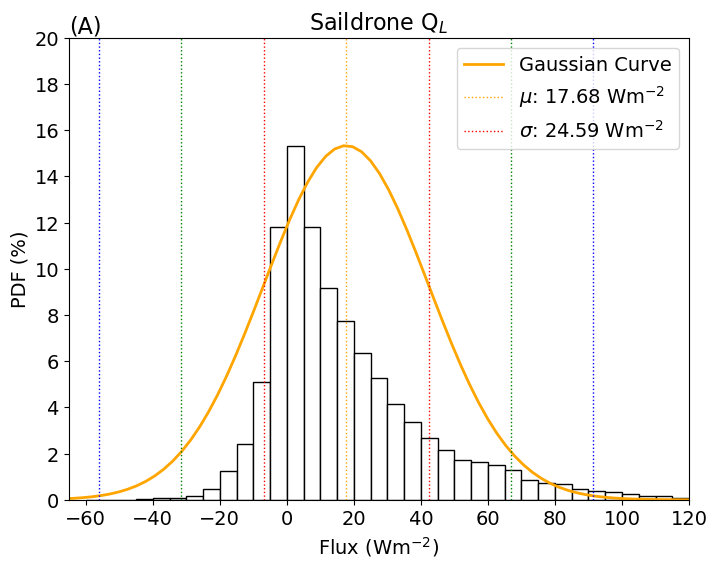

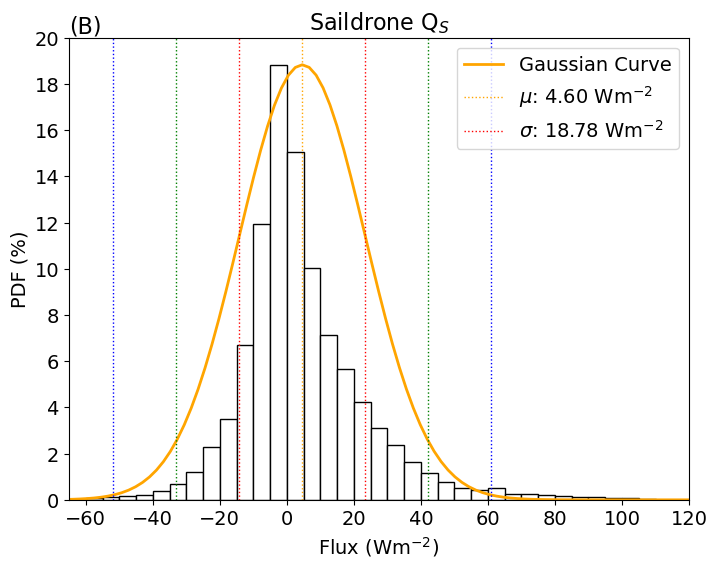

In [27]:
import seaborn as sns
s0_m = pd.read_csv('data/sd/avg-at30-2017.csv')
QL2017 = s0_m['QL']
QS2017 = s0_m['QS']

s0_m = pd.read_csv('data/sd/avg-at30-2018.csv')
QL2018 = s0_m['QL']
QS2018 = s0_m['QS']

s0_m = pd.read_csv('data/sd/avg-at30-2019.csv')
QL2019 = s0_m['QL']
QS2019 = s0_m['QS']

QLs = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QSs = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QL = QLs
QS = QSs

meanQL = np.mean(QL)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdQL = np.std(QL)
stdlabel = '$\sigma$: ' + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'

plt.figure(figsize=(8,6))

x = np.linspace(min(QL)-15, max(QL)+5, 100)
#x = np.linspace(-100, 1000, 100)
y = (1 / (stdQL * np.sqrt(2 * np.pi))) * np.exp(-(x - meanQL) ** 2 / (2 * stdQL ** 2))

bin = np.arange(math.floor(np.min(QL)/10)*10,math.ceil(np.max(QL)/10)*10+10,5)
counts, bins, ignored =  plt.hist(QL,bins = bin, color = '#FFFFFF', ec = 'black',weights=np.ones_like(QL)*100/len(QL))

max_weight = np.max(counts)
y_rescaled = y * max_weight / np.max(y)

plt.plot(x, y_rescaled, color='orange', linewidth=2,label='Gaussian Curve')

plt.axvline(meanQL, color='orange', linestyle=':', linewidth=1,label=meanlabel)
plt.axvline(meanQL+stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axvline(meanQL+stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axvline(meanQL+stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axvline(meanQL-stdQL, color='r', linestyle=':', linewidth=1)
plt.axvline(meanQL+stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axvline(meanQL+stdQL*-3, color='b', linestyle=':', linewidth=1)

plt.title('Saildrone Q$_L$',fontsize=16)
plt.ylabel('PDF (%)',fontsize=14)
plt.xlabel('Flux (Wm$^{-2}$)',fontsize=14)
plt.text(0, 1.05, '(A)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
bin = np.arange(math.floor(np.min(QL)/10)*10,math.ceil(np.max(QL)/10)*10+10,20)
plt.xticks(bin,fontsize=14)
plt.yticks(np.arange(0,22,2),fontsize=14)
plt.xlim([-65,120])

plt.legend(prop = { "size": 14 })
filepath = savepath+'/A-QL.png'
plt.savefig(filepath)

meanQS = np.mean(QS)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdQS = np.std(QS)
stdlabel = '$\sigma$: ' + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'

plt.figure(figsize=(8,6))

x = np.linspace(min(QS)-5, max(QS)+5, 100)
y = (1 / (stdQS * np.sqrt(2 * np.pi))) * np.exp(-(x - meanQS) ** 2 / (2 * stdQS ** 2))

bin = np.arange(math.floor(np.min(QS)/10)*10,math.ceil(np.max(QS)/10)*10+10,5)
counts, bins, ignored =  plt.hist(QS,bins = bin, color = '#FFFFFF', ec = 'black',weights=np.ones_like(QS)*100/len(QS))

max_weight = np.max(counts)
y_rescaled = y * max_weight / np.max(y)

plt.plot(x, y_rescaled, color='orange', linewidth=2,label='Gaussian Curve')

plt.axvline(meanQS, color='orange', linestyle=':', linewidth=1,label=meanlabel)
plt.axvline(meanQS+stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axvline(meanQS+stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axvline(meanQS+stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axvline(meanQS-stdQS, color='r', linestyle=':', linewidth=1)
plt.axvline(meanQS+stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axvline(meanQS+stdQS*-3, color='b', linestyle=':', linewidth=1)

plt.title('Saildrone Q$_S$',fontsize=16)
plt.ylabel('PDF (%)',fontsize=14)
plt.xlabel('Flux (Wm$^{-2}$)',fontsize=14)
plt.text(0, 1.05, '(B)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
bin = np.arange(math.floor(np.min(QL)/10)*10,math.ceil(np.max(QL)/10)*10+10,20)
plt.xticks(bin,fontsize=14)
plt.yticks(np.arange(0,22,2),fontsize=14)
plt.xlim([-65,120])

plt.legend(prop = { "size": 14 })
filepath = savepath+'/B-QS.png'
plt.savefig(filepath)

-117.75126195017496
115.92426743570962
-122.2367031580607
47.81454881086205


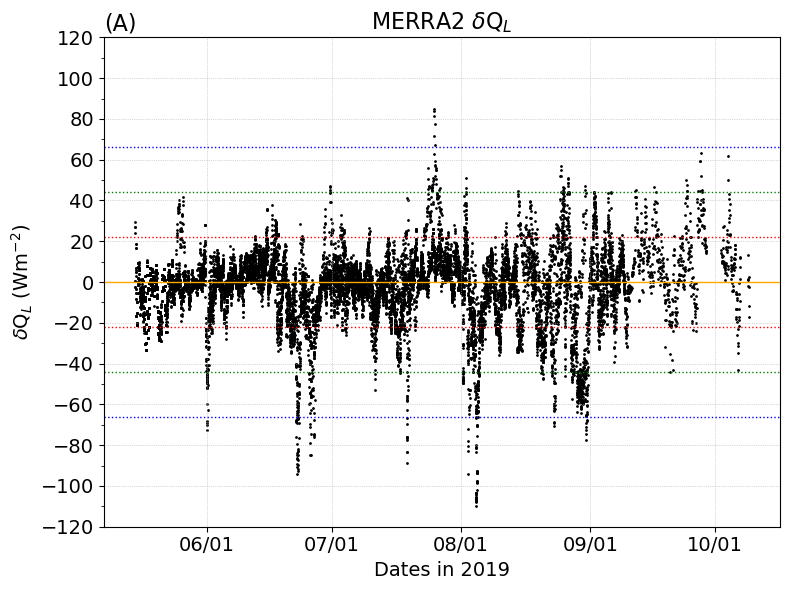

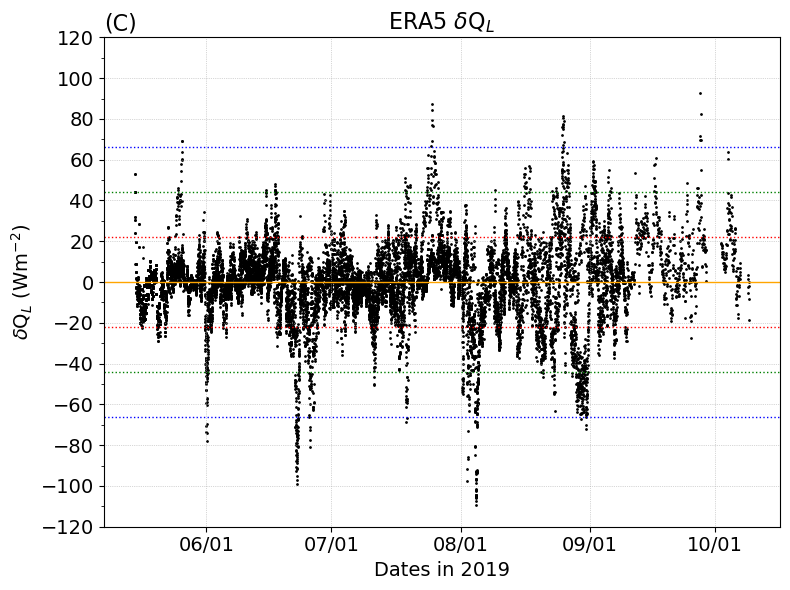

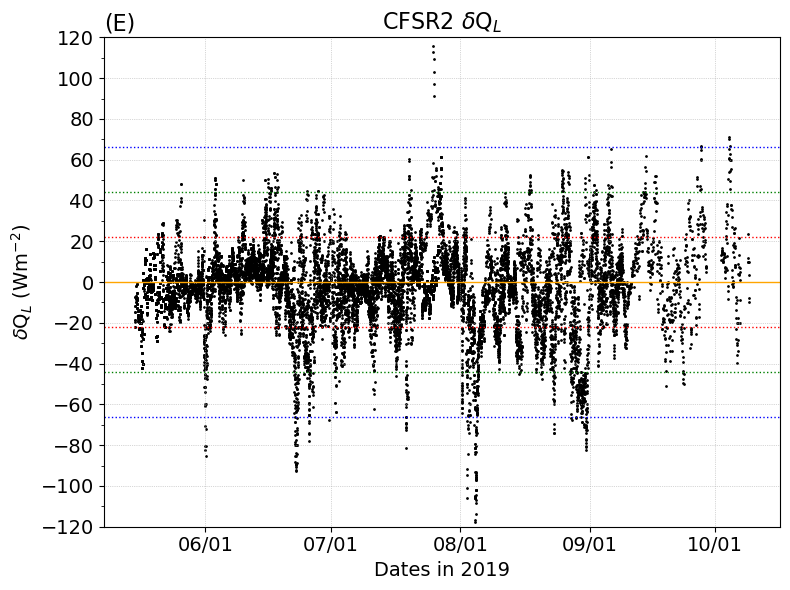

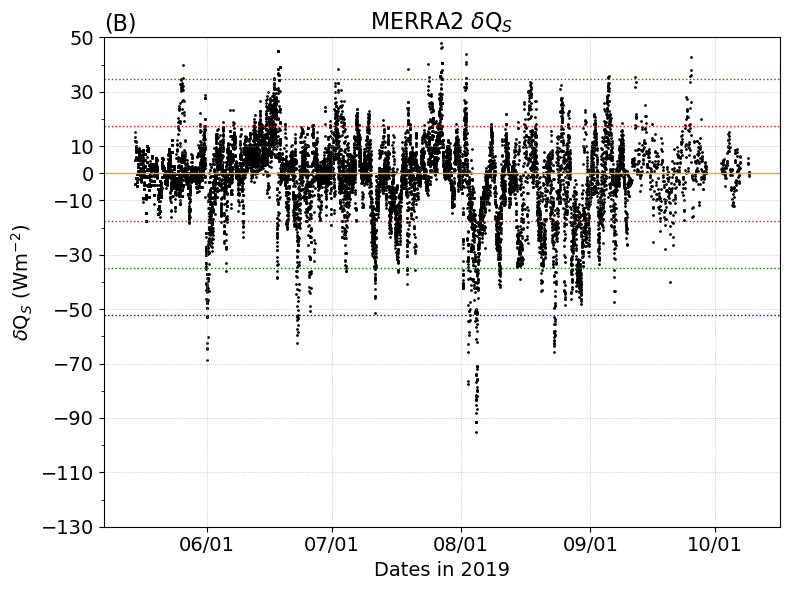

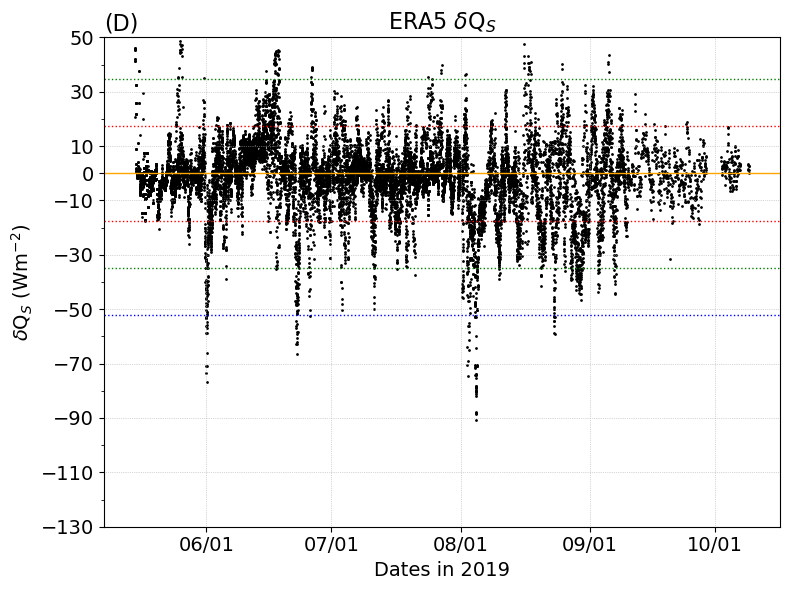

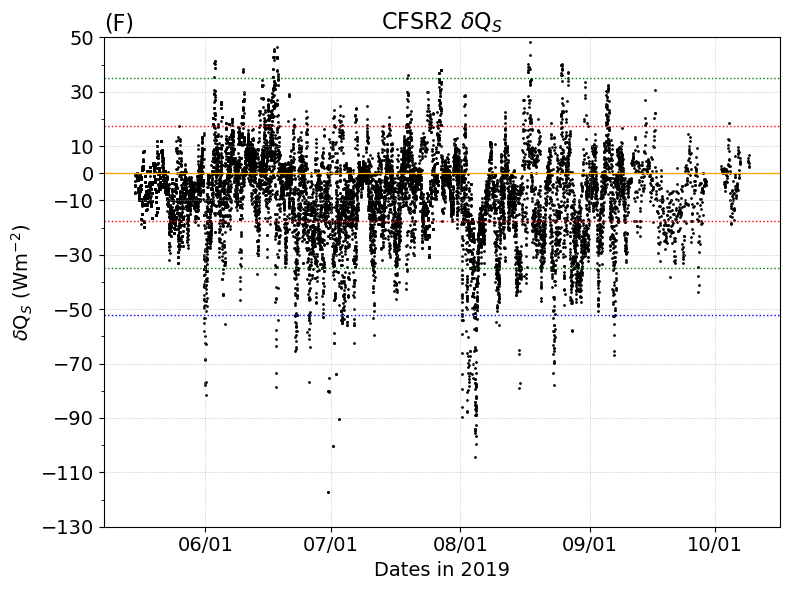

In [3]:
# 2019 diff
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QLm = m['QL']
QSm = m['QS']

ts_m = []
QLs_m = []
QSs_m = []
for t in tm:
    k = find_nearest(t0,t)
    ts_m.append(t0[k])
    QLs_m.append(QL0[k])
    QSs_m.append(QS0[k])

ts_m = pd.to_datetime(ts_m,unit='s')
tm = pd.to_datetime(tm,unit='s')

s0_e = pd.read_csv('data/e5/sd-for-e5-2019.csv')
e = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_e['datetime']
QL0 = s0_e['QL']
QS0 = s0_e['QS']

te = e['datetime']
QLe = e['QL']
QSe = e['QS']

ts_e = []
QLs_e = []
QSs_e = []
for t in te:
    k = find_nearest(t0,t)
    ts_e.append(t0[k])
    QLs_e.append(QL0[k])
    QSs_e.append(QS0[k])

ts_e = pd.to_datetime(ts_e,unit='s')
te = pd.to_datetime(te,unit='s')

s0_c = pd.read_csv('data/c2/sd-for-c2-2019.csv')
c = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_c['datetime']
QL0 = s0_c['QL']
QS0 = s0_c['QS']

tc = c['datetime']
QLc = c['QL']
QSc = c['QS']

ts_c = []
QLs_c = []
QSs_c = []
for t in tc:
    k = find_nearest(t0,t)
    ts_c.append(t0[k])
    QLs_c.append(QL0[k])
    QSs_c.append(QS0[k])

ts_c = pd.to_datetime(ts_c,unit='s')
tc = pd.to_datetime(tc,unit='s')

s = pd.read_csv('data/sd/avg-at30-2019.csv')
s['datetime'] = pd.to_datetime(s['datetime'], unit='s', origin='unix')
ts = s['datetime']
QLs = s['QL']
QSs = s['QS']

print(np.min([np.min(QLc-QLs_c),np.min(QLm-QLs_m),np.min(QLe-QLs_e)]))
print(np.max([np.max(QLc-QLs_c),np.max(QLm-QLs_m),np.max(QLe-QLs_e)]))

print(np.min([np.min(QSc-QLs_c),np.min(QSm-QLs_m),np.min(QSe-QLs_e)]))
print(np.max([np.max(QSc-QLs_c),np.max(QSm-QLs_m),np.max(QSe-QLs_e)]))
# QL 2019
# Set min and max values for y-axis
plot_min = -120
plot_max = 120

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QLm-QLs_m, s=1, c='k')
meanQL = np.mean(QLm-QLs_m)
stdQL = np.std(QLs_m)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(stdQL*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(A)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('MERRA2 $\delta$Q$_L$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
filepath = savepath+'/2019/A-diff.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QLe-QLs_e, s=1, c='k')
meanQL = np.mean(QLe-QLs_e)
stdQL = np.std(QLs_e)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(stdQL*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(C)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('ERA5 $\delta$Q$_L$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
filepath = savepath+'/2019/C-diff.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QLc-QLs_c, s=1, c='k')
meanQL = np.mean(QLc-QLs_c)
stdQL = np.std(QLs_c)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(stdQL) + ' Wm$^{-2}$'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(stdQL*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(E)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('CFSR2 $\delta$Q$_L$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
filepath = savepath+'/2019/E-diff.png'
plt.savefig(filepath)

# QS 2019
# Set min and max values for y-axis
plot_min = -130
plot_max = 50

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.append(np.arange(plot_min, plot_max+20, 20),0),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QSm-QSs_m, s=1, c='k')
meanQS = np.mean(QSm-QSs_m)
stdQS = np.std(QSs_m)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(-1*stdQS, color='r', linestyle=':', linewidth=1)
plt.axhline(stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(B)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('MERRA2 $\delta$Q$_S$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
filepath = savepath+'/2019/B-diff.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.append(np.arange(plot_min, plot_max+20, 20),0),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QSe-QSs_e, s=1, c='k')
meanQS = np.mean(QSe-QSs_e)
stdQS = np.std(QSs_e)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(stdQS) + ' Wm$^{-2}$'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(-1*stdQS, color='r', linestyle=':', linewidth=1)
plt.axhline(stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(D)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('ERA5 $\delta$Q$_S$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
filepath = savepath+'/2019/D-diff.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=14)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.append(np.arange(plot_min, plot_max+20, 20),0),fontsize=14)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QSc-QSs_c, s=1, c='k')
meanQS = np.mean(QSc-QSs_c)
stdQS = np.std(QSs_c)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(stdQS*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(F)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.title('CFSR2 $\delta$Q$_S$',fontsize=16)
plt.xlabel('Dates in 2019',fontsize=14)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=14)

plt.tight_layout()
filepath = savepath+'/2019/F-diff.png'
plt.savefig(filepath)

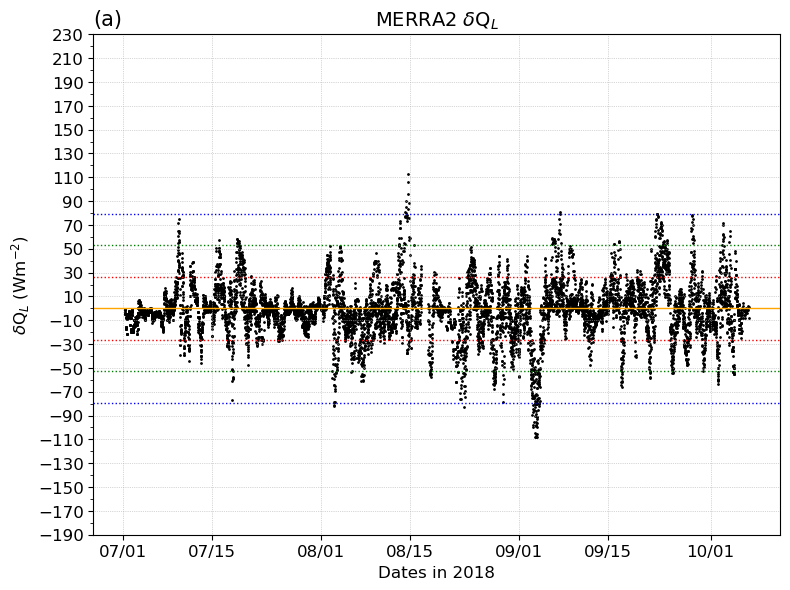

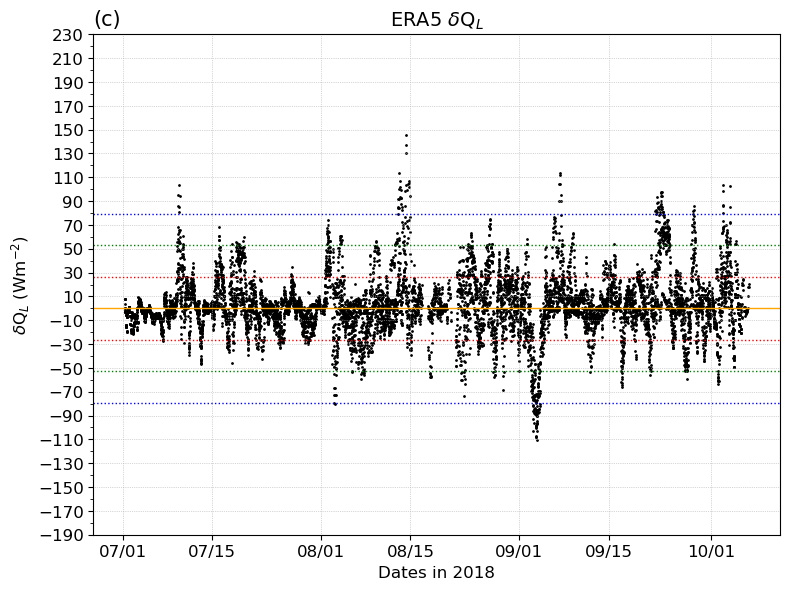

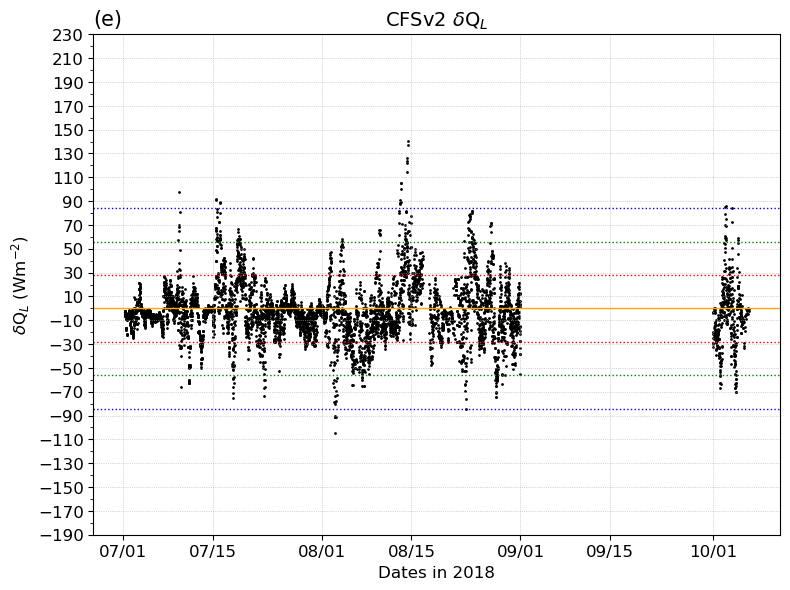

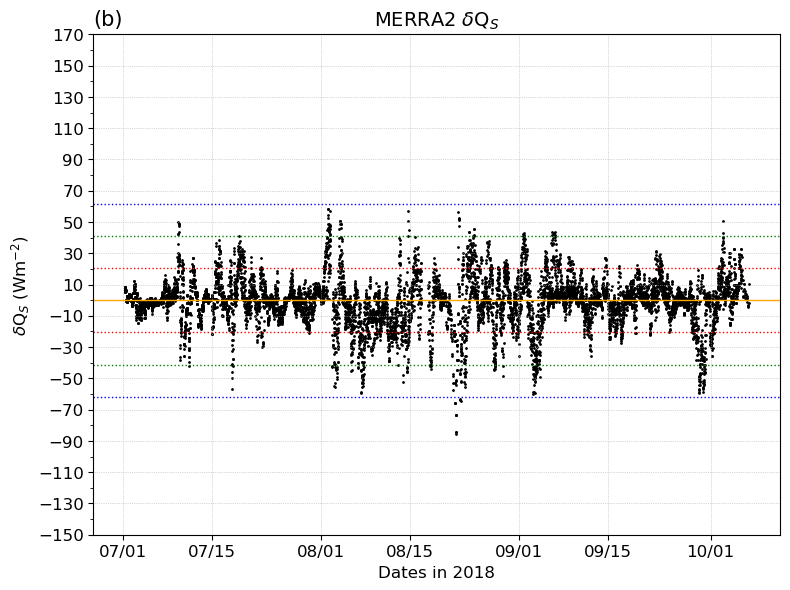

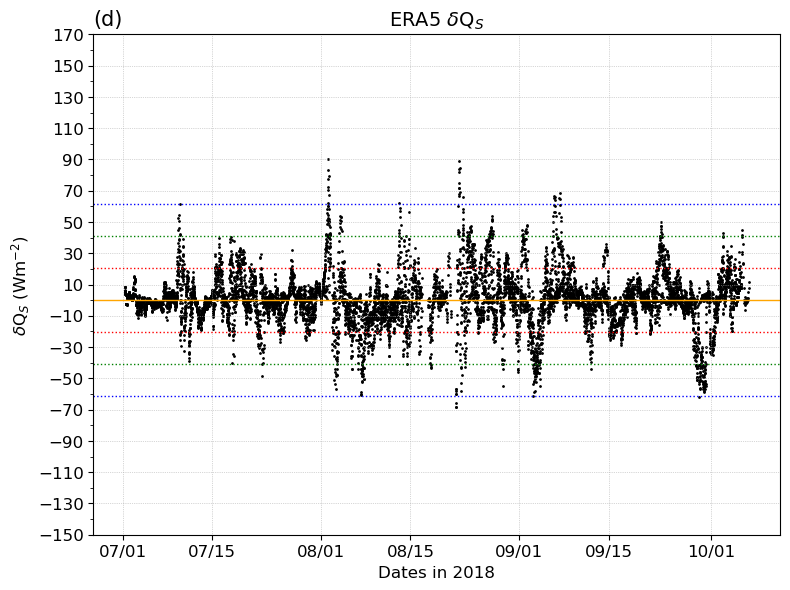

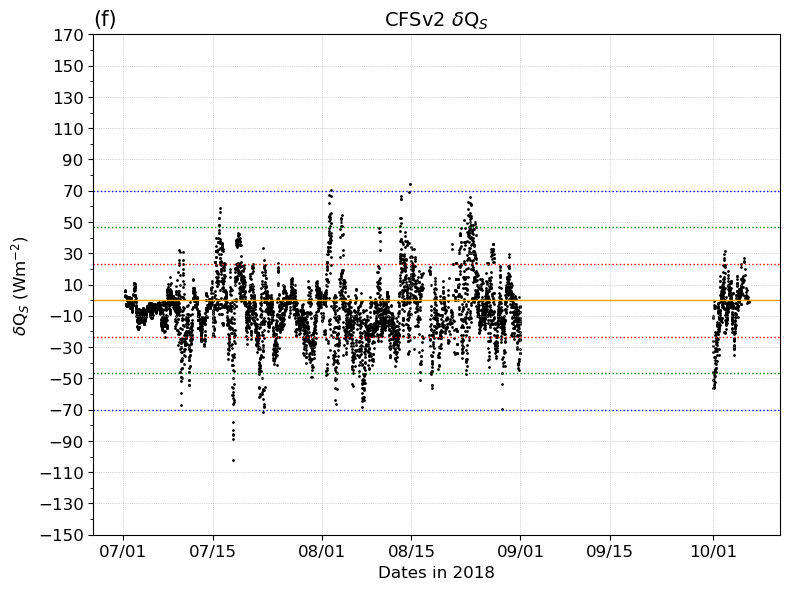

In [20]:
# 2018 diff
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2018.csv')
m = pd.read_csv('data/m2/m2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QLm = m['QL']
QSm = m['QS']

ts_m = []
QLs_m = []
QSs_m = []
for t in tm:
    k = find_nearest(t0,t)
    ts_m.append(t0[k])
    QLs_m.append(QL0[k])
    QSs_m.append(QS0[k])

ts_m = pd.to_datetime(ts_m,unit='s')
tm = pd.to_datetime(tm,unit='s')

s0_e = pd.read_csv('data/e5/sd-for-e5-2018.csv')
e = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_e['datetime']
QL0 = s0_e['QL']
QS0 = s0_e['QS']

te = e['datetime']
QLe = e['QL']
QSe = e['QS']

ts_e = []
QLs_e = []
QSs_e = []
for t in te:
    k = find_nearest(t0,t)
    ts_e.append(t0[k])
    QLs_e.append(QL0[k])
    QSs_e.append(QS0[k])

ts_e = pd.to_datetime(ts_e,unit='s')
te = pd.to_datetime(te,unit='s')

s0_c = pd.read_csv('data/c2/sd-for-c2-2018.csv')
c = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_c['datetime']
QL0 = s0_c['QL']
QS0 = s0_c['QS']

tc = c['datetime']
QLc = c['QL']
QSc = c['QS']

ts_c = []
QLs_c = []
QSs_c = []
for t in tc:
    k = find_nearest(t0,t)
    ts_c.append(t0[k])
    QLs_c.append(QL0[k])
    QSs_c.append(QS0[k])

ts_c = pd.to_datetime(ts_c,unit='s')
tc = pd.to_datetime(tc,unit='s')

s = pd.read_csv('data/sd/avg-at30-2018.csv')
s['datetime'] = pd.to_datetime(s['datetime'], unit='s', origin='unix')
ts = s['datetime']
QLs = s['QL']
QSs = s['QS']

# QL 2018
# Set min and max values for y-axis
plot_min = -190
plot_max = 220

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QLm-QLs_m, s=1, c='k')
meanQL = 0
stdQL = np.std(QLs_m)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(stdQL*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(a)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('MERRA2 $\delta$Q$_L$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2018/A-diff.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QLe-QLs_e, s=1, c='k')
meanQL = 0
stdQL = np.std(QLs_e)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(c)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('ERA5 $\delta$Q$_L$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2018/C-diff.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QLc-QLs_c, s=1, c='k')
meanQL = 0
stdQL = np.std(QLs_c)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(e)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('CFSR2 $\delta$Q$_L$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2018/E-diff.png'
plt.savefig(filepath)

# QS 2018
# Set min and max values for y-axis
plot_min = -150
plot_max = 170

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QSm-QSs_m, s=1, c='k')
meanQS = 0
stdQS = np.std(QSs_m)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(b)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('MERRA2 $\delta$Q$_S$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2018/B-diff.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QSe-QSs_e, s=1, c='k')
meanQS = 0
stdQS = np.std(QSs_e)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(d)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('ERA5 $\delta$Q$_S$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2018/D-diff.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QSc-QSs_c, s=1, c='k')
meanQS = 0
stdQS = np.std(QSs_c)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(f)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('CFSR2 $\delta$Q$_S$',fontsize=14)
plt.xlabel('Dates in 2018',fontsize=12)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2018/F-diff.png'
plt.savefig(filepath)

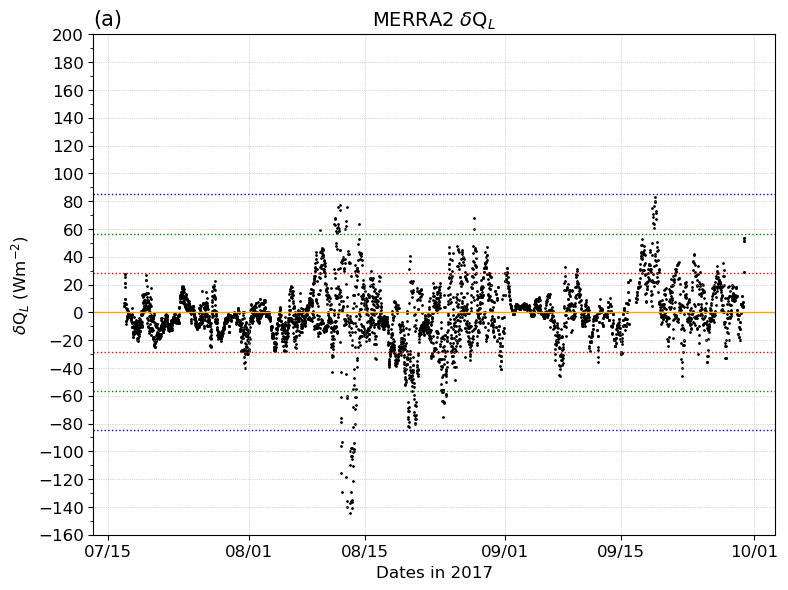

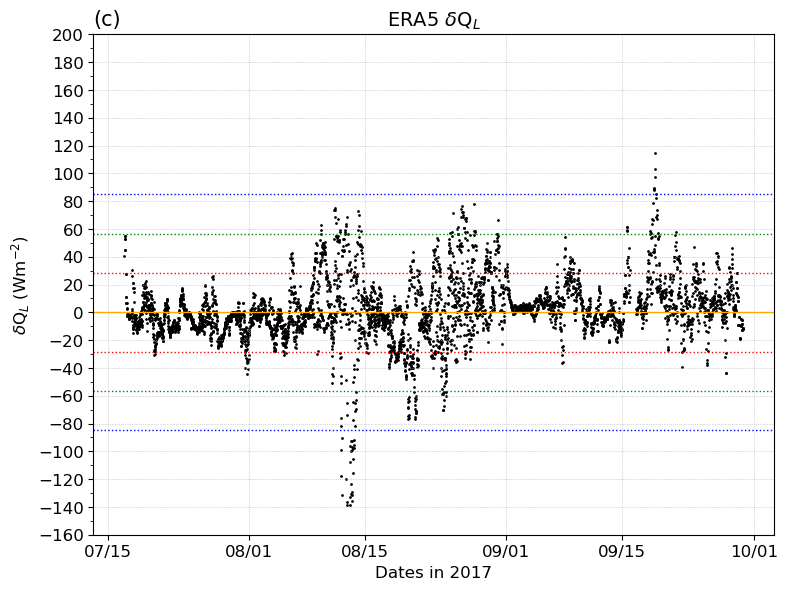

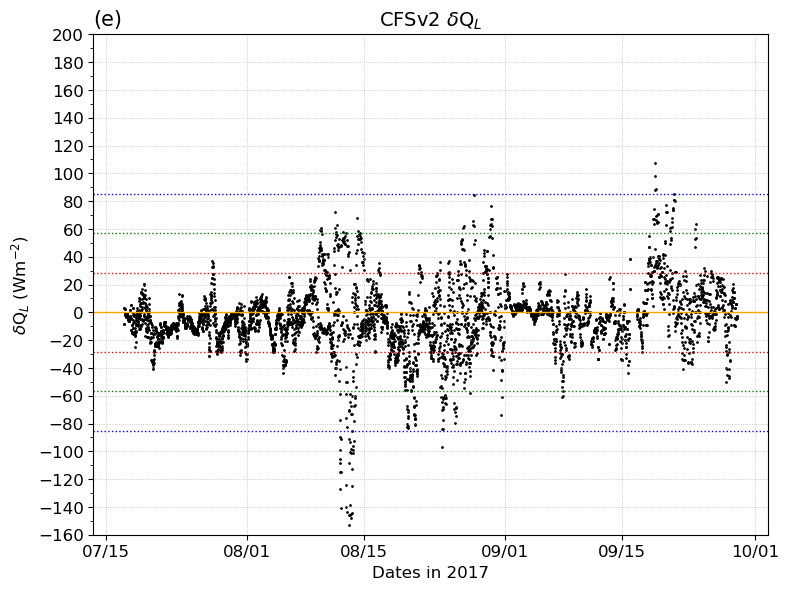

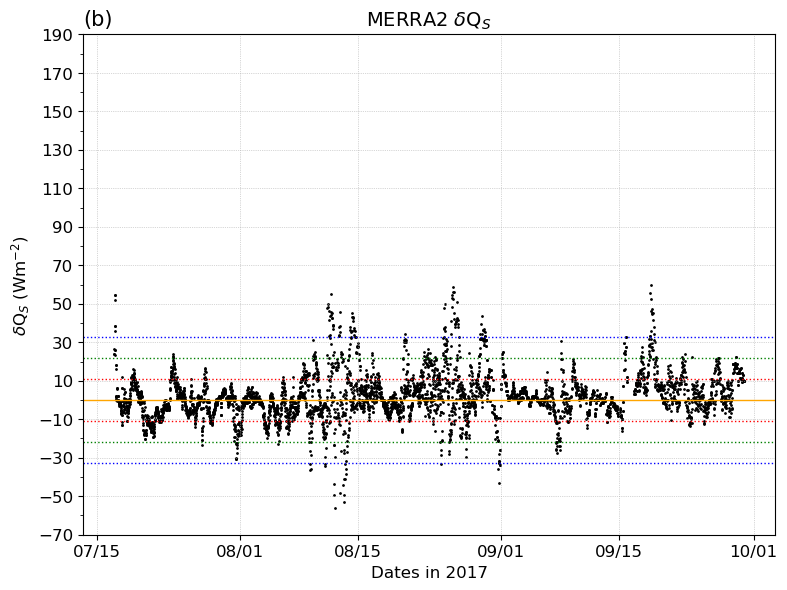

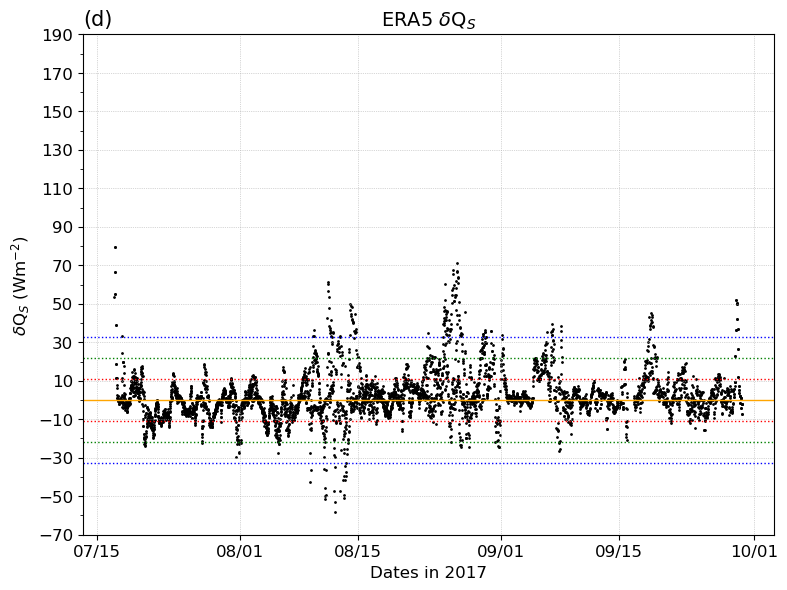

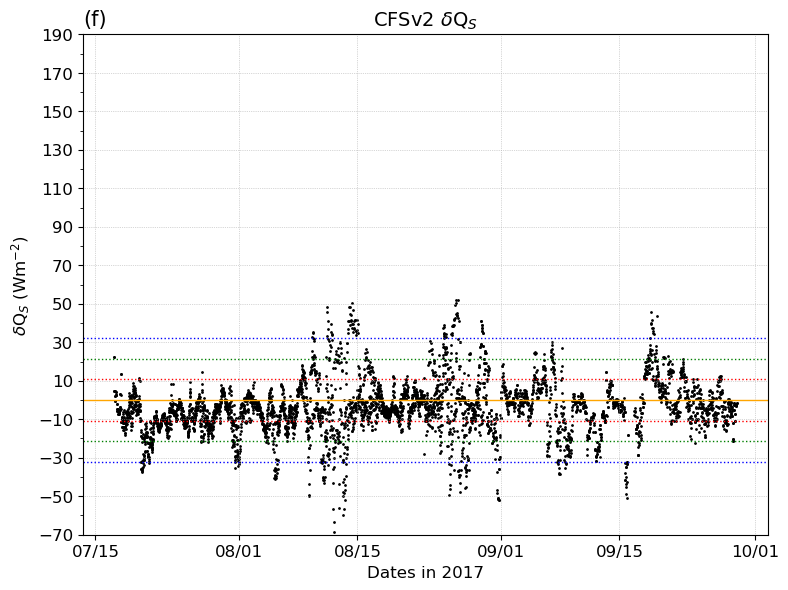

In [21]:
# 2017 diff
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QLm = m['QL']
QSm = m['QS']

ts_m = []
QLs_m = []
QSs_m = []
for t in tm:
    k = find_nearest(t0,t)
    ts_m.append(t0[k])
    QLs_m.append(QL0[k])
    QSs_m.append(QS0[k])

ts_m = pd.to_datetime(ts_m,unit='s')
tm = pd.to_datetime(tm,unit='s')

s0_e = pd.read_csv('data/e5/sd-for-e5-2017.csv')
e = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_e['datetime']
QL0 = s0_e['QL']
QS0 = s0_e['QS']

te = e['datetime']
QLe = e['QL']
QSe = e['QS']

ts_e = []
QLs_e = []
QSs_e = []
for t in te:
    k = find_nearest(t0,t)
    ts_e.append(t0[k])
    QLs_e.append(QL0[k])
    QSs_e.append(QS0[k])

ts_e = pd.to_datetime(ts_e,unit='s')
te = pd.to_datetime(te,unit='s')

s0_c = pd.read_csv('data/c2/sd-for-c2-2017.csv')
c = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_c['datetime']
QL0 = s0_c['QL']
QS0 = s0_c['QS']

tc = c['datetime']
QLc = c['QL']
QSc = c['QS']

ts_c = []
QLs_c = []
QSs_c = []
for t in tc:
    k = find_nearest(t0,t)
    ts_c.append(t0[k])
    QLs_c.append(QL0[k])
    QSs_c.append(QS0[k])

ts_c = pd.to_datetime(ts_c,unit='s')
tc = pd.to_datetime(tc,unit='s')

s = pd.read_csv('data/sd/avg-at30-2017.csv')
s['datetime'] = pd.to_datetime(s['datetime'], unit='s', origin='unix')
ts = s['datetime']
QLs = s['QL']
QSs = s['QS']

# QL 2017
# Set min and max values for y-axis
plot_min = -160
plot_max = 200

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QLm-QLs_m, s=1, c='k')
meanQL = 0
stdQL = np.std(QLs_m)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(a)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('MERRA2 $\delta$Q$_L$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2017/A-diff.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QLe-QLs_e, s=1, c='k')
meanQL = 0
stdQL = np.std(QLs_e)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(c)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('ERA5 $\delta$Q$_L$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2017/C-diff.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QLc-QLs_c, s=1, c='k')
meanQL = 0
stdQL = np.std(QLs_c)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
plt.axhline(meanQL, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQL+stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQL+stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQL-stdQL, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQL+stdQL*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(e)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('CFSR2 $\delta$Q$_L$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('$\delta$Q$_L$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2017/E-diff.png'
plt.savefig(filepath)

# QS 2017
# Set min and max values for y-axis
plot_min = -70
plot_max = 180

# MERRA2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tm, QSm-QSs_m, s=1, c='k')
meanQS = 0
stdQS = np.std(QSs_m)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(b)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('MERRA2 $\delta$Q$_S$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2017/B-diff.png'
plt.savefig(filepath)

# ERA5
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(te, QSe-QSs_e, s=1, c='k')
meanQS = 0
stdQS = np.std(QSs_e)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(d)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('ERA5 $\delta$Q$_S$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2017/D-diff.png'
plt.savefig(filepath)

# CFSR2
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.ylim(plot_min, plot_max)  # Set y-axis limits with 0 included
plt.yticks(np.arange(plot_min, plot_max+20, 20),fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

plt.scatter(tc, QSc-QSs_c, s=1, c='k')
meanQS = 0
stdQS = np.std(QSs_c)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
plt.axhline(meanQS, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(meanQS+stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(meanQS+stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axhline(meanQS-stdQS, color='r', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(meanQS+stdQS*-3, color='b', linestyle=':', linewidth=1)
plt.text(0, 1.05, '(f)', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.title('CFSR2 $\delta$Q$_S$',fontsize=14)
plt.xlabel('Dates in 2017',fontsize=12)
plt.ylabel('$\delta$Q$_S$ (Wm$^{-2}$)',fontsize=12)

plt.tight_layout()
filepath = savepath+'/2017/F-diff.png'
plt.savefig(filepath)

In [64]:
# MERRA2 tables
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2018.csv')
m = pd.read_csv('data/m2/m2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

deltaQL = QL-QLs
deltaQS = QS-QSs


In [69]:
# ERA5 tables
# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2017.csv')
m = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2018.csv')
m = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

deltaQL = QL-QLs
deltaQS = QS-QSs

In [4]:
# CFSR2 tables
# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2017.csv')
m = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2018.csv')
m = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2019.csv')
m = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

deltaQL = QL-QLs
deltaQS = QS-QSs

print(np.mean(QL))
print(np.std(QL))
print(np.mean(QS))
print(np.std(QS))

print(np.mean(deltaQL))
print(np.std(deltaQL))
print(np.mean(deltaQS))
print(np.std(deltaQS))

15.542391970248262
25.221872887611397
-2.2317605801166946
19.210146987262814
-3.302845294169136
21.737839861963202
-7.169983570282565
16.628963293770585


In [9]:
# for tables
meane = 0
stde = np.std(QLs)

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(deltaQL):
    if flux>meane+stde*3:
        max3.append(idx)
    elif flux<meane+stde*-3:
        min3.append(idx)
    elif np.logical_and(flux<=meane+stde*3,flux>meane+stde*2):
        max2.append(idx)
    elif np.logical_and(flux>=meane+stde*-3,flux<meane+stde*-2):
        min2.append(idx)
    elif np.logical_and(flux<=meane+stde*2,flux>meane+stde):
        max1.append(idx)
    elif np.logical_and(flux>=meane+stde*-2,flux<meane-stde):
        min1.append(idx)

# distribution tables
print((len(QL)-len(max1)-len(max2)-len(max3)-len(min1)-len(min2)-len(min3))/len(QL)*100)
print(len(min1)/len(QL)*100+len(max1)/len(QL)*100)
print(len(max1)/len(QL)*100)
print(len(min2)/len(QL)*100+len(max2)/len(QL)*100)
print(len(max2)/len(QL)*100)
print(len(min3)/len(QL)*100+len(max3)/len(QL)*100)
print(len(min3)/len(QL)*100)
print(len(QL))

80.79648744415344
15.197966415036205
5.946695424433831
3.239100292712987
1.1592974888306886
0.7664458480973656
0.5430596210137113
25964


100.0

In [12]:
# for tables
meane = 0
stde = np.std(QSs)

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(deltaQS):
    if flux>meane+stde*3:
        max3.append(idx)
    elif flux<meane+stde*-3:
        min3.append(idx)
    elif np.logical_and(flux<=meane+stde*3,flux>meane+stde*2):
        max2.append(idx)
    elif np.logical_and(flux>=meane+stde*-3,flux<meane+stde*-2):
        min2.append(idx)
    elif np.logical_and(flux<=meane+stde*2,flux>meane+stde):
        max1.append(idx)
    elif np.logical_and(flux>=meane+stde*-2,flux<meane-stde):
        min1.append(idx)

# distribution tables
print((len(QS)-len(max1)-len(max2)-len(max3)-len(min1)-len(min2)-len(min3))/len(QS)*100)
print(len(max1)/len(QS)*100)
print(len(min1)/len(QS)*100)
print(len(max2)/len(QS)*100)
print(len(min2)/len(QS)*100)
print(len(max3)/len(QS)*100)
print(len(min3)/len(QS)*100)
print(len(QS))

print(len(max1)/len(QS)*100+len(min1)/len(QS)*100)
print(len(max2)/len(QS)*100+len(min2)/len(QS)*100)
print(len(max3)/len(QS)*100+len(min3)/len(QS)*100)
1.04+4.66+20.09+74.21

74.21429671853336
4.059466954244338
16.02603604991527
1.0399014019411492
3.620397473424742
0.0962871668464027
0.9436142350947465
25964
20.08550300415961
4.660298875365891
1.0399014019411492


100.0

In [20]:
print('MERRA QL')
print(np.mean(QLm-QLs_m))
print(np.std(QLm-QLs_m))
print('ERA QL')
print(np.mean(QLe-QLs_e))
print(np.std(QLe-QLs_e))
print('CFSV2 QL')
print(np.mean(QLc-QLs_c))
print(np.std(QLc-QLs_c))
print('MERRA QS')
print(np.mean(QSm-QSs_m))
print(np.std(QSm-QSs_m))
print('ERA QL')
print(np.mean(QSe-QSs_e))
print(np.std(QSe-QSs_e))
print('CFS QL')
print(np.mean(QSc-QSs_c))
print(np.std(QSc-QSs_c))

MERRA QL


NameError: name 'QLm' is not defined

-80 200
-140 120
156.85813903808594
90.63182067871094
157.42416666666665
100.40433333333334


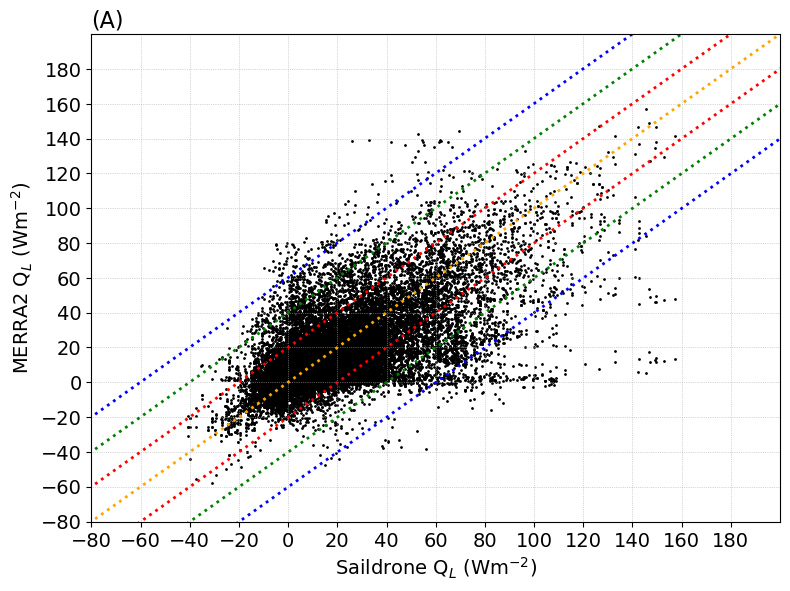

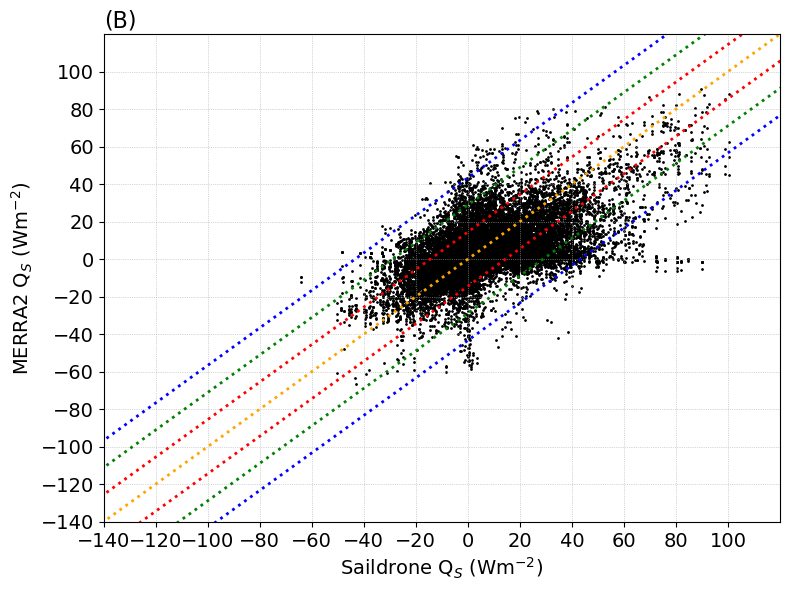

In [31]:
# MERRA2 scatter
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2018.csv')
m = pd.read_csv('data/m2/m2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

print(-80,200)
print(-140,120)

print(np.max(QL))
print(np.max(QS))
print(np.max(QLs))
print(np.max(QSs))

meanQL = np.mean(QL-QLs)
stdQL = np.std(QL-QLs)

meanQS = np.mean(QS-QSs)
stdQS = np.std(QS-QSs)

x = np.linspace(-300, 300, 3)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines
plt.scatter(QLs,QL,s=1,c='k')

stdint = [0,1,2,3]
for stdi in stdint:
    stdval = x+stdQL*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
        lbl='3$\sigma$'
    elif abs(stdi) == 2:
        stdcolor = 'g'
        lbl='2$\sigma$'
    elif abs(stdi) == 1:
        stdcolor = 'r'
        lbl='$\sigma$'
    elif abs(stdi) == 0:
        stdcolor = 'orange'
        lbl = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2,label=lbl)
stdnegint = [-1,-2,-3]
for stdi in stdnegint:
    stdval = x+stdQL*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
    elif abs(stdi) == 2:
        stdcolor = 'g'
    elif abs(stdi) == 1:
        stdcolor = 'r'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2)

plt.text(0, 1.05, '(A)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel('Saildrone Q$_L$ (Wm$^{-2}$)',fontsize=14)
plt.xticks(np.arange(-80, 200, 20),fontsize=14)
plt.xlim((-80,200))
plt.ylabel('MERRA2 Q$_L$ (Wm$^{-2}$)',fontsize=14)
plt.yticks(np.arange(-80, 200, 20),fontsize=14)
plt.ylim((-80,200))
plt.tight_layout()

filepath = savepath+'/A.png'
plt.savefig(filepath)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines
plt.scatter(QSs,QS,s=1,c='k')

stdint = [0,1,2,3]
for stdi in stdint:
    stdval = x+stdQS*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
        lbl='3$\sigma$'
    elif abs(stdi) == 2:
        stdcolor = 'g'
        lbl='2$\sigma$'
    elif abs(stdi) == 1:
        stdcolor = 'r'
        lbl='$\sigma$'
    elif abs(stdi) == 0:
        stdcolor = 'orange'
        lbl = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2,label=lbl)
stdnegint = [-1,-2,-3]
for stdi in stdnegint:
    stdval = x+stdQS*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
    elif abs(stdi) == 2:
        stdcolor = 'g'
    elif abs(stdi) == 1:
        stdcolor = 'r'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2)

plt.text(0, 1.05, '(B)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel('Saildrone Q$_S$ (Wm$^{-2}$)',fontsize=14)
plt.xticks(np.arange(-140, 120, 20),fontsize=14)
plt.xlim((-140,120))
plt.ylabel('MERRA2 Q$_S$ (Wm$^{-2}$)',fontsize=14)
plt.yticks(np.arange(-140, 120, 20),fontsize=14)
plt.ylim((-140,120))
plt.tight_layout()

filepath = savepath+'/B.png'
plt.savefig(filepath)

198.2783520050119
117.71857347104176
157.42416666666665
100.40433333333334


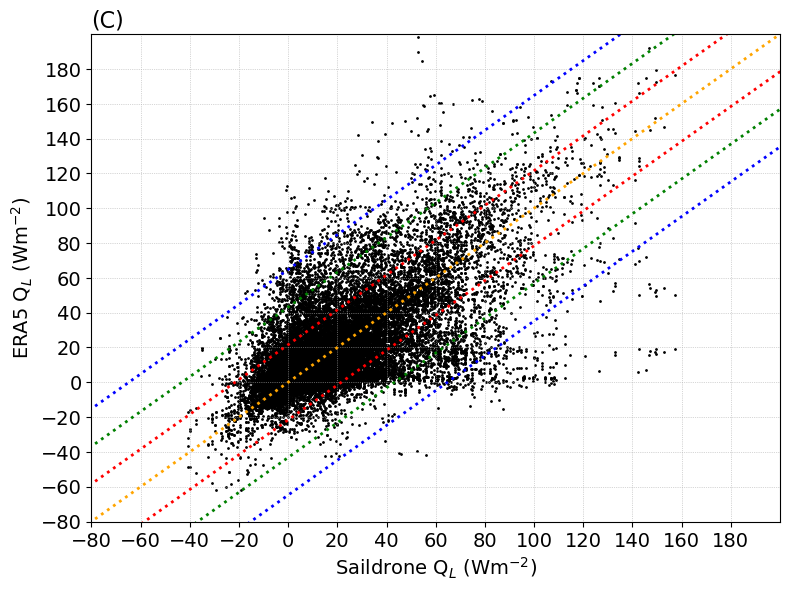

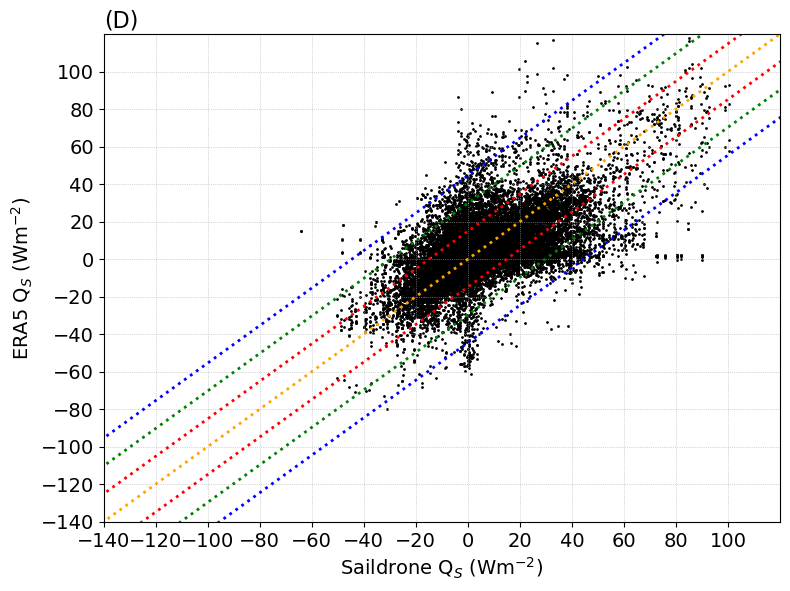

In [32]:
# ERA5 scatter
# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2017.csv')
m = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2018.csv')
m = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

print(np.max(QL))
print(np.max(QS))
print(np.max(QLs))
print(np.max(QSs))

meanQL = np.mean(QL-QLs)
stdQL = np.std(QL-QLs)

meanQS = np.mean(QS-QSs)
stdQS = np.std(QS-QSs)

x = np.linspace(-300, 300, 3)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines
plt.scatter(QLs,QL,s=1,c='k')

stdint = [0,1,2,3]
for stdi in stdint:
    stdval = x+stdQL*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
        lbl='3$\sigma$'
    elif abs(stdi) == 2:
        stdcolor = 'g'
        lbl='2$\sigma$'
    elif abs(stdi) == 1:
        stdcolor = 'r'
        lbl='$\sigma$'
    elif abs(stdi) == 0:
        stdcolor = 'orange'
        lbl = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2,label=lbl)
stdnegint = [-1,-2,-3]
for stdi in stdnegint:
    stdval = x+stdQL*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
    elif abs(stdi) == 2:
        stdcolor = 'g'
    elif abs(stdi) == 1:
        stdcolor = 'r'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2)

plt.text(0, 1.05, '(C)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel('Saildrone Q$_L$ (Wm$^{-2}$)',fontsize=14)
plt.xticks(np.arange(-80, 200, 20),fontsize=14)
plt.xlim((-80,200))
plt.ylabel('ERA5 Q$_L$ (Wm$^{-2}$)',fontsize=14)
plt.yticks(np.arange(-80, 200, 20),fontsize=14)
plt.ylim((-80,200))
plt.tight_layout()

filepath = savepath+'/C.png'
plt.savefig(filepath)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines
plt.scatter(QSs,QS,s=1,c='k')

stdint = [0,1,2,3]
for stdi in stdint:
    stdval = x+stdQS*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
        lbl='3$\sigma$'
    elif abs(stdi) == 2:
        stdcolor = 'g'
        lbl='2$\sigma$'
    elif abs(stdi) == 1:
        stdcolor = 'r'
        lbl='$\sigma$'
    elif abs(stdi) == 0:
        stdcolor = 'orange'
        lbl = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2,label=lbl)
stdnegint = [-1,-2,-3]
for stdi in stdnegint:
    stdval = x+stdQS*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
    elif abs(stdi) == 2:
        stdcolor = 'g'
    elif abs(stdi) == 1:
        stdcolor = 'r'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2)

plt.text(0, 1.05, '(D)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel('Saildrone Q$_S$ (Wm$^{-2}$)',fontsize=14)
plt.xticks(np.arange(-140, 120, 20),fontsize=14)
plt.xlim((-140,120))
plt.ylabel('ERA5 Q$_S$ (Wm$^{-2}$)',fontsize=14)
plt.yticks(np.arange(-140, 120, 20),fontsize=14)
plt.ylim((-140,120))
plt.tight_layout()

filepath = savepath+'/D.png'
plt.savefig(filepath)

191.98292541503903
113.1812744140625
157.42416666666665
100.40433333333334


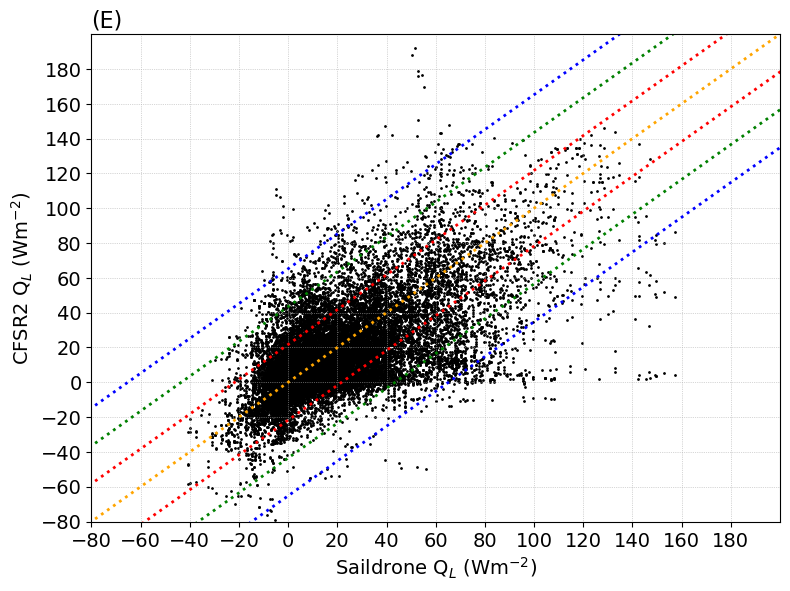

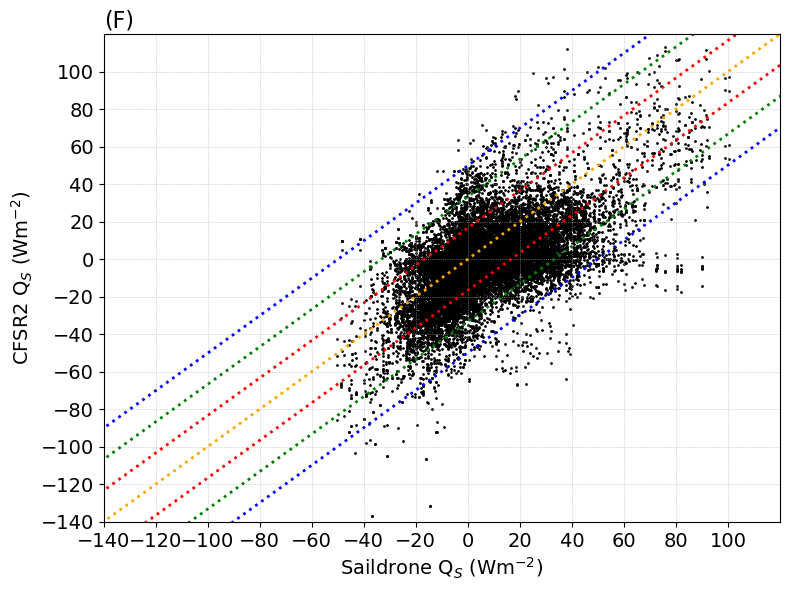

In [33]:
# CFSR2 scatter
# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2017.csv')
m = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2018.csv')
m = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2019.csv')
m = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

print(np.max(QL))
print(np.max(QS))
print(np.max(QLs))
print(np.max(QSs))

meanQL = np.mean(QL-QLs)
stdQL = np.std(QL-QLs)

meanQS = np.mean(QS-QSs)
stdQS = np.std(QS-QSs)

x = np.linspace(-300, 300, 3)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines
plt.scatter(QLs,QL,s=1,c='k')

stdint = [0,1,2,3]
for stdi in stdint:
    stdval = x+stdQL*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
        lbl='3$\sigma$'
    elif abs(stdi) == 2:
        stdcolor = 'g'
        lbl='2$\sigma$'
    elif abs(stdi) == 1:
        stdcolor = 'r'
        lbl='$\sigma$'
    elif abs(stdi) == 0:
        stdcolor = 'orange'
        lbl = '$\mu$: ' + '{:.2f}'.format(meanQL) + ' Wm$^{-2}$'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2,label=lbl)
stdnegint = [-1,-2,-3]
for stdi in stdnegint:
    stdval = x+stdQL*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
    elif abs(stdi) == 2:
        stdcolor = 'g'
    elif abs(stdi) == 1:
        stdcolor = 'r'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2)

plt.text(0, 1.05, '(E)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel('Saildrone Q$_L$ (Wm$^{-2}$)',fontsize=14)
plt.xticks(np.arange(-80, 200, 20),fontsize=14)
plt.xlim((-80,200))
plt.ylabel('CFSR2 Q$_L$ (Wm$^{-2}$)',fontsize=14)
plt.yticks(np.arange(-80, 200, 20),fontsize=14)
plt.ylim((-80,200))
plt.tight_layout()

filepath = savepath+'/E.png'
plt.savefig(filepath)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines
plt.scatter(QSs,QS,s=1,c='k')

stdint = [0,1,2,3]
for stdi in stdint:
    stdval = x+stdQS*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
        lbl='3$\sigma$'
    elif abs(stdi) == 2:
        stdcolor = 'g'
        lbl='2$\sigma$'
    elif abs(stdi) == 1:
        stdcolor = 'r'
        lbl='$\sigma$'
    elif abs(stdi) == 0:
        stdcolor = 'orange'
        lbl = '$\mu$: ' + '{:.2f}'.format(meanQS) + ' Wm$^{-2}$'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2,label=lbl)
stdnegint = [-1,-2,-3]
for stdi in stdnegint:
    stdval = x+stdQS*stdi
    if abs(stdi) == 3:
        stdcolor = 'b'
    elif abs(stdi) == 2:
        stdcolor = 'g'
    elif abs(stdi) == 1:
        stdcolor = 'r'
    plt.plot(x,stdval,':',c=stdcolor,linewidth=2)

plt.text(0, 1.05, '(F)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel('Saildrone Q$_S$ (Wm$^{-2}$)',fontsize=14)
plt.xticks(np.arange(-140, 120, 20),fontsize=14)
plt.xlim((-140,120))
plt.ylabel('CFSR2 Q$_S$ (Wm$^{-2}$)',fontsize=14)
plt.yticks(np.arange(-140, 120, 20),fontsize=14)
plt.ylim((-140,120))
plt.tight_layout()

filepath = savepath+'/F.png'
plt.savefig(filepath)

In [ ]:
# Gridpoint vs Flux Difference - MERRA2
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points on the Earth's surface
    using the Haversine formula.
    
    lon1, lat1: Longitude and latitude of the first point (in degrees).
    lon2, lat2: Longitude and latitude of the second point (in degrees).
    
    Returns the distance in kilometers.
    """
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth's radius in kilometers
    return distance
def find_nearest_expanded(coordinates, target_point):
    closest_index = 0
    closest_distance = haversine(target_point[0], target_point[1], coordinates[0][0], coordinates[0][1])
    for i, coordinate in enumerate(coordinates):
        distance = haversine(target_point[0], target_point[1], coordinate[0], coordinate[1])
        if distance < closest_distance:
            closest_index = i
    return closest_index

prd = 'raw-data/m2/2017.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['lon'][:] # degrees
latprd = f.variables['lat'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2017 = tm
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
lons2017 = []
lats2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    lons2017.append(lon0[k])
    lats2017.append(lat0[k])

# organize coordinates
location = np.stack((lons2017,lats2017),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2017 = []
lat2017 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2017.append(lonprd[grididx[k,0]])
    lat2017.append(latprd[grididx[k,1]])

prd = 'raw-data/m2/2018.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['lon'][:] # degrees
latprd = f.variables['lat'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2018.csv')
m = pd.read_csv('data/m2/m2-2018.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2018 = tm
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
lons2018 = []
lats2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    lons2018.append(lon0[k])
    lats2018.append(lat0[k])

# organize coordinates
location = np.stack((lons2018,lats2018),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2018 = []
lat2018 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2018.append(lonprd[grididx[k,0]])
    lat2018.append(latprd[grididx[k,1]])

prd = 'raw-data/m2/2019.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['lon'][:] # degrees
latprd = f.variables['lat'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2019 = tm
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
lons2019 = []
lats2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    lons2019.append(lon0[k])
    lats2019.append(lat0[k])

# organize coordinates
location = np.stack((lons2019,lats2019),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2019 = []
lat2019 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2019.append(lonprd[grididx[k,0]])
    lat2019.append(latprd[grididx[k,1]])

tiempo = np.concatenate((t2017,t2018,t2019),axis=None)
longitude = np.concatenate((lon2017,lon2018,lon2019),axis=None)
latitude = np.concatenate((lat2017,lat2018,lat2019),axis=None)

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

stats = np.array([tiempo,longitude,latitude])
stats = stats.T
stats = pd.DataFrame(stats,columns=['datetime','lon','lat'])
stats.to_csv('data/m2/m2-location.csv', encoding='utf-8', index=False)

In [ ]:
# Gridpoint vs Flux Difference - ERA5
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points on the Earth's surface
    using the Haversine formula.
    
    lon1, lat1: Longitude and latitude of the first point (in degrees).
    lon2, lat2: Longitude and latitude of the second point (in degrees).
    
    Returns the distance in kilometers.
    """
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth's radius in kilometers
    return distance
def find_nearest_expanded(coordinates, target_point):
    closest_index = 0
    closest_distance = haversine(target_point[0], target_point[1], coordinates[0][0], coordinates[0][1])
    for i, coordinate in enumerate(coordinates):
        distance = haversine(target_point[0], target_point[1], coordinate[0], coordinate[1])
        if distance < closest_distance:
            closest_index = i
    return closest_index

prd = 'raw-data/e5/2017.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['longitude'][:] # degrees
latprd = f.variables['latitude'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2017.csv')
m = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2017 = tm
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
lons2017 = []
lats2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    lons2017.append(lon0[k])
    lats2017.append(lat0[k])

# organize coordinates
location = np.stack((lons2017,lats2017),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2017 = []
lat2017 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2017.append(lonprd[grididx[k,0]])
    lat2017.append(latprd[grididx[k,1]])

prd = 'raw-data/e5/2018.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['longitude'][:] # degrees
latprd = f.variables['latitude'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2018.csv')
m = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2018 = tm
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
lons2018 = []
lats2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    lons2018.append(lon0[k])
    lats2018.append(lat0[k])

# organize coordinates
location = np.stack((lons2018,lats2018),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2018 = []
lat2018 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2018.append(lonprd[grididx[k,0]])
    lat2018.append(latprd[grididx[k,1]])

prd = 'raw-data/e5/2019.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['longitude'][:] # degrees
latprd = f.variables['latitude'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2019 = tm
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
lons2019 = []
lats2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    lons2019.append(lon0[k])
    lats2019.append(lat0[k])

# organize coordinates
location = np.stack((lons2019,lats2019),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2019 = []
lat2019 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2019.append(lonprd[grididx[k,0]])
    lat2019.append(latprd[grididx[k,1]])

tiempo = np.concatenate((t2017,t2018,t2019),axis=None)
longitude = np.concatenate((lon2017,lon2018,lon2019),axis=None)
latitude = np.concatenate((lat2017,lat2018,lat2019),axis=None)

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

stats = np.array([tiempo,longitude,latitude])
stats = stats.T
stats = pd.DataFrame(stats,columns=['datetime','lon','lat'])
stats.to_csv('data/e5/e5-location.csv', encoding='utf-8', index=False)

In [ ]:
# Gridpoint vs Flux Difference - CFSR2
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points on the Earth's surface
    using the Haversine formula.
    
    lon1, lat1: Longitude and latitude of the first point (in degrees).
    lon2, lat2: Longitude and latitude of the second point (in degrees).
    
    Returns the distance in kilometers.
    """
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth's radius in kilometers
    return distance
def find_nearest_expanded(coordinates, target_point):
    closest_index = 0
    closest_distance = haversine(target_point[0], target_point[1], coordinates[0][0], coordinates[0][1])
    for i, coordinate in enumerate(coordinates):
        distance = haversine(target_point[0], target_point[1], coordinate[0], coordinate[1])
        if distance < closest_distance:
            closest_index = i
            closest_distance = distance
    return closest_index

prd = 'raw-data/c2/2017-QL.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['longitude'][:] # degrees
latprd = f.variables['latitude'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2017.csv')
m = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2017 = tm
QL2017 = m['QL']
QS2017 = m['QS']

QLs2017 = []
QSs2017 = []
lons2017 = []
lats2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    lons2017.append(lon0[k])
    lats2017.append(lat0[k])

# organize coordinates
location = np.stack((lons2017,lats2017),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2017 = []
lat2017 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2017.append(lonprd[grididx[k,0]])
    lat2017.append(latprd[grididx[k,1]])

prd = 'raw-data/c2/2018-QL.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['longitude'][:] # degrees
latprd = f.variables['latitude'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2018.csv')
m = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2018 = tm
QL2018 = m['QL']
QS2018 = m['QS']

QLs2018 = []
QSs2018 = []
lons2018 = []
lats2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    lons2018.append(lon0[k])
    lats2018.append(lat0[k])

# organize coordinates
location = np.stack((lons2018,lats2018),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2018 = []
lat2018 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2018.append(lonprd[grididx[k,0]])
    lat2018.append(latprd[grididx[k,1]])

prd = 'raw-data/c2/2019-QL.nc'
f = nc.Dataset(prd,mode='r')
lonprd = f.variables['longitude'][:] # degrees
latprd = f.variables['latitude'][:] # degrees

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2019.csv')
m = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_m['datetime']
lon0 = s0_m['lon']
lat0 = s0_m['lat']
QL0 = s0_m['QL']
QS0 = s0_m['QS']

tm = m['datetime']
t2019 = tm
QL2019 = m['QL']
QS2019 = m['QS']

QLs2019 = []
QSs2019 = []
lons2019 = []
lats2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    lons2019.append(lon0[k])
    lats2019.append(lat0[k])

# organize coordinates
location = np.stack((lons2019,lats2019),axis=1) # set saildrone coordinates

gridlocation = [] # set MERRA2 coordinates
grididx = []
for idx_lon, lon in enumerate(lonprd):
    for idx_lat,lat in enumerate(latprd):
        gridlocation.append([lon,lat])
        grididx.append([idx_lon,idx_lat])
gridlocation = np.asarray(gridlocation)
grididx = np.asarray(grididx)

lon2019 = []
lat2019 = []
for loc in location:
    k = find_nearest_expanded(gridlocation,loc)
    lon2019.append(lonprd[grididx[k,0]])
    lat2019.append(latprd[grididx[k,1]])

tiempo = np.concatenate((t2017,t2018,t2019),axis=None)
longitude = np.concatenate((lon2017,lon2018,lon2019),axis=None)
latitude = np.concatenate((lat2017,lat2018,lat2019),axis=None)

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

stats = np.array([tiempo,longitude,latitude])
stats = stats.T
stats = pd.DataFrame(stats,columns=['datetime','lon','lat'])
stats.to_csv('data/c2/c2-location.csv', encoding='utf-8', index=False)

In [ ]:
QLdiff = QL-QLs

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines
plt.scatter(d,QLdiff,s=1,c='k')
plt.xlabel('distance (km)',fontsize=14)
plt.ylabel('CFSR2 $\delta$Q$_L$ (Wm$^{-2}$)',fontsize=14)

QSdiff = QS-QSs

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines
plt.scatter(d,QSdiff,s=1,c='k')
plt.xlabel('distance (km)',fontsize=14)
plt.ylabel('CFSR2 $\delta$Q$_S$ (Wm$^{-2}$)',fontsize=14)

In [18]:
# RMSD MERRA2
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2018.csv')
m = pd.read_csv('data/m2/m2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)

Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)

meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs

qdiff = (qs-qss) - (qa - qas)

Tdiff = (SST-SSTs) - (T - Ts)

Vdiff = V-Vs

Cp = 4814
Le = 2.5e6
rho = 1.293
CCC = 1.7

rQL = math.sqrt(np.square(QLdiff).mean())
rq = Cp*math.sqrt(np.square(qdiff).mean())

rQS = math.sqrt(np.square(QSdiff).mean())
rT = math.sqrt(np.square(Tdiff).mean())

rVS = np.sqrt(np.sum(np.square(Vdiff))/len(V))

rVL = np.sqrt(np.sum(np.square(Vdiff))/len(V))

In [23]:
# RMSD ERA5
# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2017.csv')
m = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2018.csv')
m = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)

Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)

meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs

qdiff = (qs-qss) - (qa - qas)

Tdiff = (SST-SSTs) - (T - Ts)

Vdiff = V-Vs

Cp = 4814
Le = 2.5e6
rho = 1.293
CCC = 1.7

In [25]:
# RMSD CFSR2
# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2017.csv')
m = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2018.csv')
m = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2019.csv')
m = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)

Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)

meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs

qdiff = (qs-qa) - (qss - qas)

Tdiff = (SST-T) - (SSTs - Ts)

Vdiff = V-Vs

Cp = 4814
Le = 2.5e6
rho = 1.293
CCC = 1.7

/var/folders/3l/j3kcxkqj48nfc2s15vk53s0w0000gn/T/ipykernel_83172/4137119818.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
/var/folders/3l/j3kcxkqj48nfc2s15vk53s0w0000gn/T/ipykernel_83172/4137119818.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


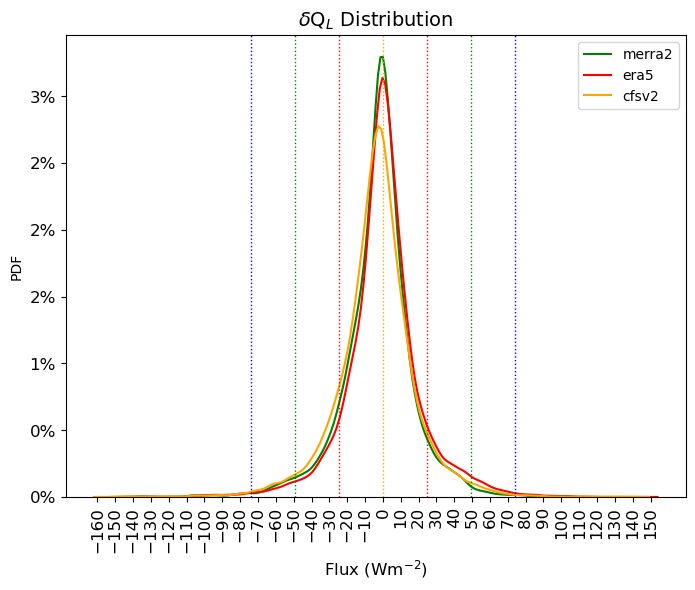

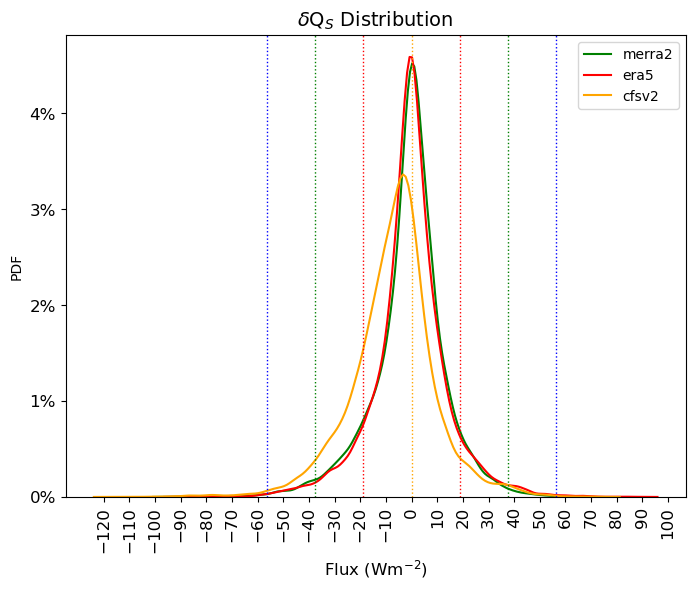

In [45]:
# load and match data
s0_m = pd.read_csv('data/sd/avg-at30-2017.csv')
QL2017 = s0_m['QL']
QS2017 = s0_m['QS']

s0_m = pd.read_csv('data/sd/avg-at30-2018.csv')
QL2018 = s0_m['QL']
QS2018 = s0_m['QS']

s0_m = pd.read_csv('data/sd/avg-at30-2019.csv')
QL2019 = s0_m['QL']
QS2019 = s0_m['QS']

QLs = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QSs = np.concatenate((QS2017,QS2018,QS2019),axis=None)

meanQL = 0
stdQL = np.std(QLs)
meanQS = 0
stdQS = np.std(QSs)

plt.figure(figsize=(8,6))
sns.kdeplot(QLdiffm, color='green',label='merra2')
sns.kdeplot(QLdiffe, color='red',label='era5')
sns.kdeplot(QLdiffc, color='orange',label='cfsv2')

arraymin = [np.min(QLdiffm),np.min(QLdiffe),np.min(QLdiffc)]
arraymax = [np.max(QLdiffm),np.max(QLdiffe),np.max(QLdiffc)]
bin = np.arange(math.floor(np.min(arraymin)/10)*10,math.ceil(np.max(arraymax)/10)*10+10,10)
plt.xticks(bin,fontsize=12,rotation=90)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.tick_params(axis='both', which='both', labelsize=12)
plt.title('$\delta$Q$_L$ Distribution',fontsize=14)
plt.ylabel('PDF')
plt.xlabel('Flux (Wm$^{-2}$)',fontsize=12)
plt.legend()

plt.axvline(meanQL, color='orange', linestyle=':', linewidth=1,label=meanlabel)
plt.axvline(meanQL+stdQL, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axvline(meanQL+stdQL*2, color='g', linestyle=':', linewidth=1)
plt.axvline(meanQL+stdQL*3, color='b', linestyle=':', linewidth=1)
plt.axvline(meanQL-stdQL, color='r', linestyle=':', linewidth=1)
plt.axvline(meanQL+stdQL*-2, color='g', linestyle=':', linewidth=1)
plt.axvline(meanQL+stdQL*-3, color='b', linestyle=':', linewidth=1)

plt.figure(figsize=(8,6))
sns.kdeplot(QSdiffm, color='green',label='merra2')
sns.kdeplot(QSdiffe, color='red',label='era5')
sns.kdeplot(QSdiffc, color='orange',label='cfsv2')

arraymin = [np.min(QSdiffm),np.min(QSdiffe),np.min(QSdiffc)]
arraymax = [np.max(QSdiffm),np.max(QSdiffe),np.max(QSdiffc)]
bin = np.arange(math.floor(np.min(arraymin)/10)*10,math.ceil(np.max(arraymax)/10)*10+10,10)
plt.xticks(bin,fontsize=12,rotation=90)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.tick_params(axis='both', which='both', labelsize=12)

plt.title('$\delta$Q$_S$ Distribution',fontsize=14)
plt.ylabel('PDF')
plt.xlabel('Flux (Wm$^{-2}$)',fontsize=12)
plt.legend()

plt.axvline(meanQS, color='orange', linestyle=':', linewidth=1,label=meanlabel)
plt.axvline(meanQS+stdQS, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axvline(meanQS+stdQS*2, color='g', linestyle=':', linewidth=1)
plt.axvline(meanQS+stdQS*3, color='b', linestyle=':', linewidth=1)
plt.axvline(meanQS-stdQS, color='r', linestyle=':', linewidth=1)
plt.axvline(meanQS+stdQS*-2, color='g', linestyle=':', linewidth=1)
plt.axvline(meanQS+stdQS*-3, color='b', linestyle=':', linewidth=1)

540
29064


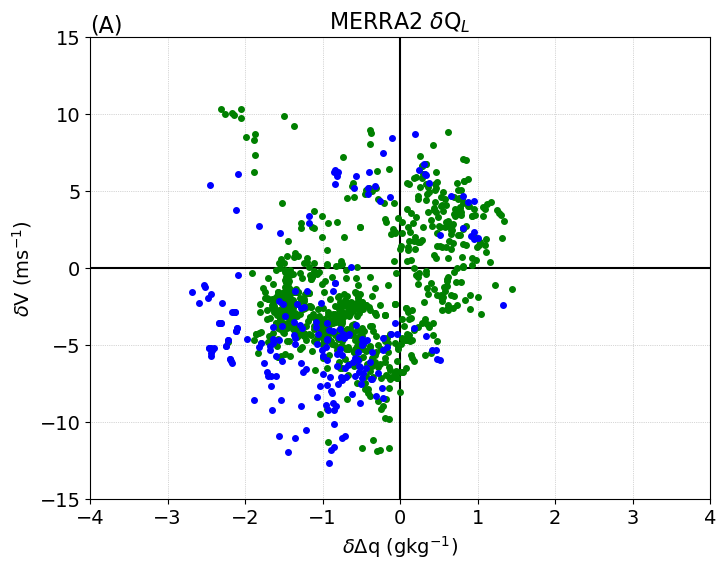

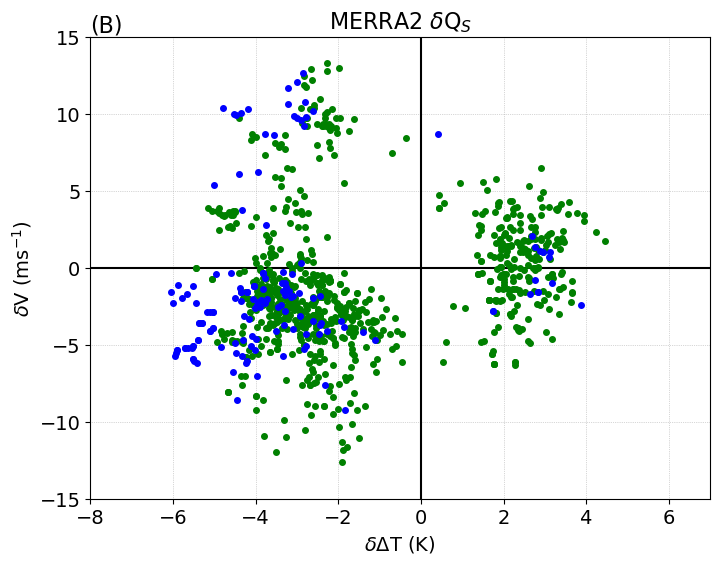

In [41]:
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(Vdiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(Vdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(Vdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(Vdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(Vdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(Vdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(q2min,u2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(q2max,u2max,'.',c='g',markersize=8)
plt.plot(q3min,u3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(q3max,u3max,'.',c='b',markersize=8)

print(len(q2min))
print(len(QLdiff))

plt.text(0, 1.05, '(A)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('MERRA2 $\delta$Q$_L$', fontsize=16)
plt.xlabel('$\delta\Delta$q (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta$V (ms$^{-1}$)',fontsize=14)
plt.xlim([-4,4])
plt.ylim([-15,15])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/A.png'
plt.savefig(filepath)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(Vdiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(Vdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(Vdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(Vdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(Vdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(Vdiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(q2min,u2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(q2max,u2max,'.',c='g',markersize=8)
plt.plot(q3min,u3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(q3max,u3max,'.',c='b',markersize=8,label='>3$\sigma$')

plt.text(0, 1.05, '(B)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('MERRA2 $\delta$Q$_S$',fontsize=16)
plt.xlabel('$\delta\Delta$T (K)',fontsize=14)
plt.ylabel('$\delta$V (ms$^{-1}$)',fontsize=14)
plt.xlim([-8,7])
plt.ylim([-15,15])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/B.png'
plt.savefig(filepath)

In [24]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(qdiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(Vdiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(Tdiff, QSdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(Vdiff, QSdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")



Correlation Coefficient: 0.6258905419686311
P-value: 0.0
Correlation Coefficient: 0.3476525963701236
P-value: 0.0
Correlation Coefficient: 0.7864028826849524
P-value: 0.0
Correlation Coefficient: 0.0036720557503792887
P-value: 0.5540751738860749


In [ ]:
## t-test 
import scipy

print(scipy.stats.ttest_ind(QS,QSs))
print(scipy.stats.ttest_ind(QSdiff,QSs*0))
print(scipy.stats.ttest_ind(QS,QSs))
print(scipy.stats.ttest_ind(QSdiff,QSs*0))

In [38]:
meanQL = float(np.mean(QL))
meanQLs = float(np.mean(QLs))
stdQL = float(np.std(QL))
stdQLs = float(np.std(QLs))

diffQL = QL - QLs
n = len(diffQL)
std = ((stdQL**2+stdQLs**2)/2)**(1/2)

err  = std/np.sqrt(n)

t_stat = (meanQL - meanQLs)/err

dof = n-1

p_val = 2 * (1 - stats.t.cdf(np.abs(t_stat), dof))

p_val

0.0

In [ ]:
# location analysis
df = pd.read_csv('data/m2/m2-location.csv')
df['coords'] = list(zip(df['datetime'],df['lon'],df['lat']))
pair_counts = df['coords'].value_counts()
pair_counts = pd.Series(pair_counts, name='count')
pair_counts.to_csv('data/m2/m2-coords-time.csv')

df = pd.read_csv('data/m2/m2-location.csv')
df['coords'] = list(zip(df['lon'],df['lat']))
pair_counts = df['coords'].value_counts()
pair_counts = pd.Series(pair_counts, name='count')
pair_counts.to_csv('data/m2/m2-coords.csv')

df = pd.read_csv('data/e5/e5-location.csv')
df['coords'] = list(zip(df['datetime'],df['lon'],df['lat']))
pair_counts = df['coords'].value_counts()
pair_counts = pd.Series(pair_counts, name='count')
pair_counts.to_csv('data/e5/e5-coords-time.csv')

df = pd.read_csv('data/e5/e5-location.csv')
df['coords'] = list(zip(df['lon'],df['lat']))
pair_counts = df['coords'].value_counts()
pair_counts = pd.Series(pair_counts, name='count')
pair_counts.to_csv('data/e5/e5-coords.csv')

df = pd.read_csv('data/c2/c2-location.csv')
df['coords'] = list(zip(df['datetime'],df['lon'],df['lat']))
pair_counts = df['coords'].value_counts()
pair_counts = pd.Series(pair_counts, name='count')
pair_counts.to_csv('data/c2/c2-coords-time.csv')

df = pd.read_csv('data/c2/c2-location.csv')
df['coords'] = list(zip(df['lon'],df['lat']))
pair_counts = df['coords'].value_counts()
pair_counts = pd.Series(pair_counts, name='count')
pair_counts.to_csv('data/c2/c2-coords.csv')

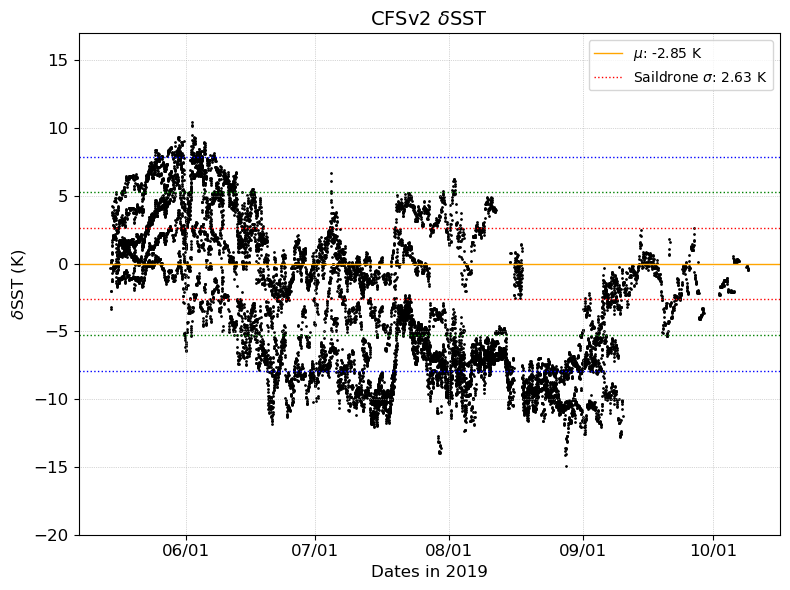

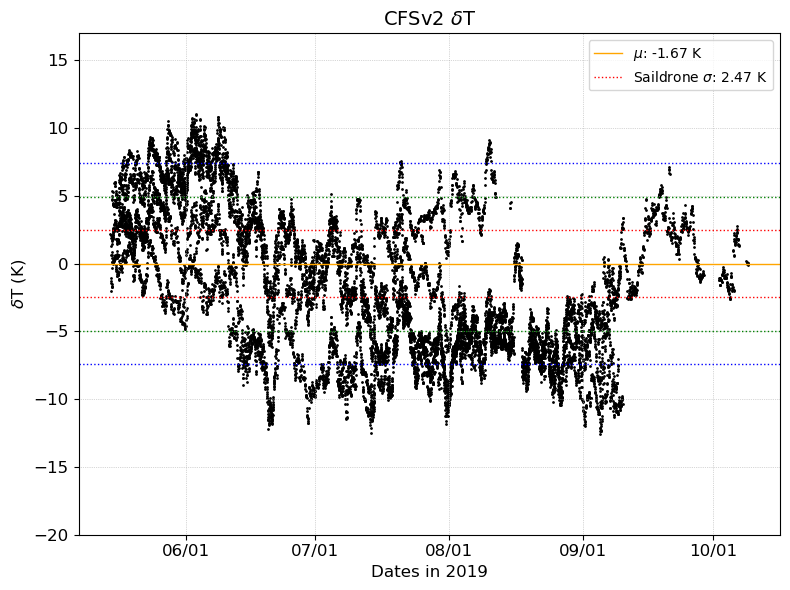

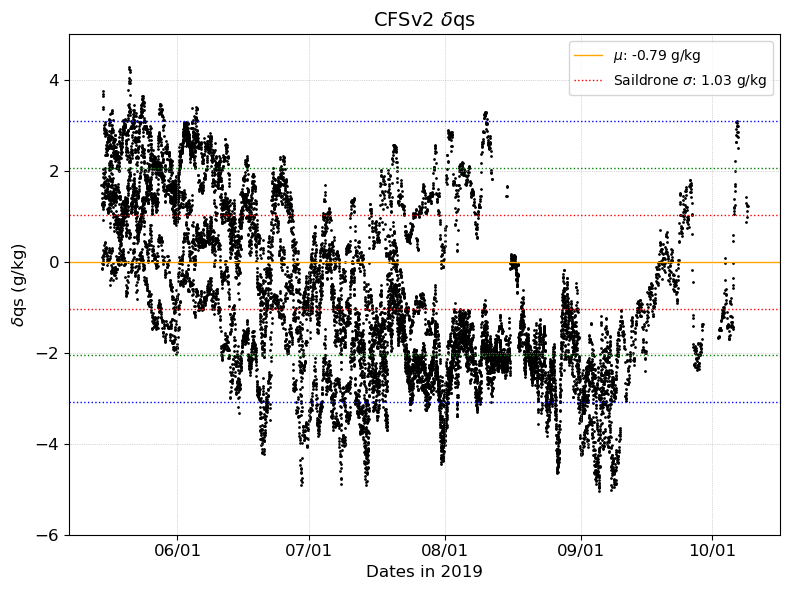

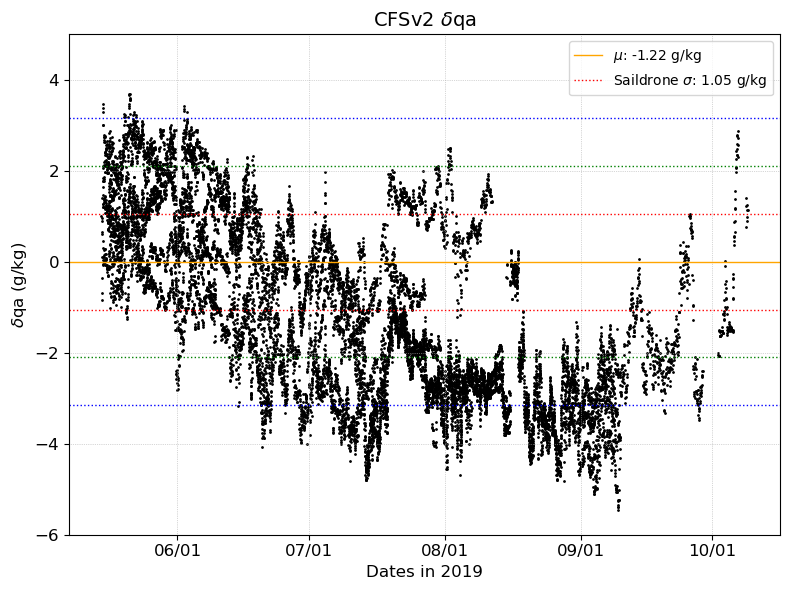

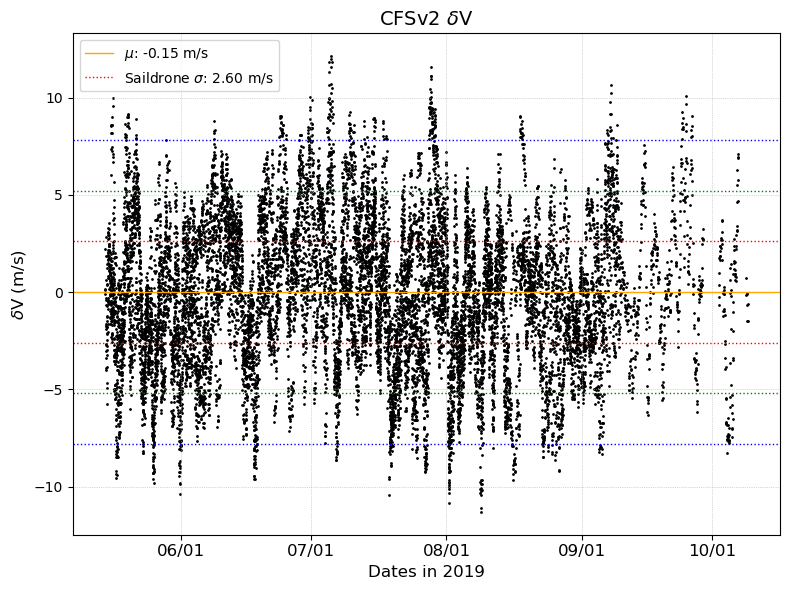

In [120]:
# 2019 diff for cfsv2
s0_c = pd.read_csv('data/c2/sd-for-c2-2019.csv')
c = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_c['datetime']
SST0 = s0_c['SST']
T0 = s0_c['T']
qs0 = s0_c['qs']
qa0 = s0_c['qa']
V0 = s0_c['V']

tc = c['datetime']
SST = c['SST']
T = c['T']
qs = c['qs']
qa = c['qa']
V = c['V']

ts = []
SSTs = []
Ts = []
qss = []
qas = []
Vs = []
for t in tc:
    k = find_nearest(t0,t)
    ts.append(t0[k])
    SSTs.append(SST0[k])
    Ts.append(T0[k])
    qss.append(qs0[k])
    qas.append(qa0[k])
    Vs.append(V0[k])

ts = pd.to_datetime(ts,unit='s')
tc = pd.to_datetime(tc,unit='s')

# SST
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

vardiff = SST - SSTs

plt.scatter(tc, vardiff, c='k',s=1)
meanvar = np.mean(vardiff)
std_s = np.std(SSTs)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanvar) + ' K'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(std_s) + ' K'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(std_s, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(std_s*2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*3, color='b', linestyle=':', linewidth=1)
plt.axhline(std_s*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(std_s*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*-3, color='b', linestyle=':', linewidth=1)

plt.title('CFSR2 $\delta$SST',fontsize=14)
plt.xlabel('Dates in 2019',fontsize=12)
plt.ylabel('$\delta$SST (K)',fontsize=12)
plt.legend()

minnn = -20
maxxx = 17
plt.ylim(minnn,maxxx)  # Set y-axis limits with 0 included
plt.yticks(np.arange(minnn, maxxx, 5),fontsize=12)

plt.tight_layout()
filepath = savepath+'/2019/SST.png'
plt.savefig(filepath)

# T
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

vardiff = T - Ts

plt.scatter(tc, vardiff, c='k',s=1)
meanvar = np.mean(vardiff)
std_s = np.std(Ts)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanvar) + ' K'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(std_s) + ' K'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(std_s, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(std_s*2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*3, color='b', linestyle=':', linewidth=1)
plt.axhline(std_s*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(std_s*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*-3, color='b', linestyle=':', linewidth=1)

plt.title('CFSR2 $\delta$T',fontsize=14)
plt.xlabel('Dates in 2019',fontsize=12)
plt.ylabel('$\delta$T (K)',fontsize=12)
plt.legend()

minnn = -20
maxxx = 17
plt.ylim(minnn,maxxx)  # Set y-axis limits with 0 included
plt.yticks(np.arange(minnn, maxxx, 5),fontsize=12)

plt.tight_layout()
filepath = savepath+'/2019/T.png'
plt.savefig(filepath)

###

# qs
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

vardiff = qs - qss

plt.scatter(tc, vardiff, c='k',s=1)
meanvar = np.mean(vardiff)
std_s = np.std(qss)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanvar) + ' g/kg'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(std_s) + ' g/kg'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(std_s, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(std_s*2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*3, color='b', linestyle=':', linewidth=1)
plt.axhline(std_s*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(std_s*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*-3, color='b', linestyle=':', linewidth=1)

plt.title('CFSR2 $\delta$qs',fontsize=14)
plt.xlabel('Dates in 2019',fontsize=12)
plt.ylabel('$\delta$qs (g/kg)',fontsize=12)
plt.legend()

minnn = -6
maxxx = 5
plt.ylim(minnn,maxxx)  # Set y-axis limits with 0 included
plt.yticks(np.arange(minnn, maxxx, 2),fontsize=12)

plt.tight_layout()
filepath = savepath+'/2019/qs.png'
plt.savefig(filepath)

# qa
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

vardiff = qa - qas

plt.scatter(tc, vardiff, c='k',s=1)
meanvar = np.mean(vardiff)
std_s = np.std(qas)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanvar) + ' g/kg'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(std_s) + ' g/kg'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(std_s, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(std_s*2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*3, color='b', linestyle=':', linewidth=1)
plt.axhline(std_s*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(std_s*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*-3, color='b', linestyle=':', linewidth=1)

plt.title('CFSR2 $\delta$qa',fontsize=14)
plt.xlabel('Dates in 2019',fontsize=12)
plt.ylabel('$\delta$qa (g/kg)',fontsize=12)
plt.legend()

minnn = -6
maxxx = 5
plt.ylim(minnn,maxxx)  # Set y-axis limits with 0 included
plt.yticks(np.arange(minnn, maxxx, 2),fontsize=12)

plt.tight_layout()
filepath = savepath+'/2019/qa.png'
plt.savefig(filepath)

###
# V
plt.figure(figsize=(8,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

vardiff = V - Vs

plt.scatter(tc, vardiff, c='k',s=1)
meanvar = np.mean(vardiff)
std_s = np.std(Vs)
meanlabel = '$\mu$: ' + '{:.2f}'.format(meanvar) + ' m/s'
stdlabel = 'Saildrone $\sigma$: ' + '{:.2f}'.format(std_s) + ' m/s'
plt.axhline(0, color='orange', linestyle='-', linewidth=1,label=meanlabel)
plt.axhline(std_s, color='r', linestyle=':', linewidth=1,label=stdlabel)
plt.axhline(std_s*2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*3, color='b', linestyle=':', linewidth=1)
plt.axhline(std_s*-1, color='r', linestyle=':', linewidth=1)
plt.axhline(std_s*-2, color='g', linestyle=':', linewidth=1)
plt.axhline(std_s*-3, color='b', linestyle=':', linewidth=1)

plt.title('CFSR2 $\delta$V',fontsize=14)
plt.xlabel('Dates in 2019',fontsize=12)
plt.ylabel('$\delta$V (m/s)',fontsize=12)
plt.legend()

plt.tight_layout()
filepath = savepath+'/2019/V.png'
plt.savefig(filepath)

540
29064


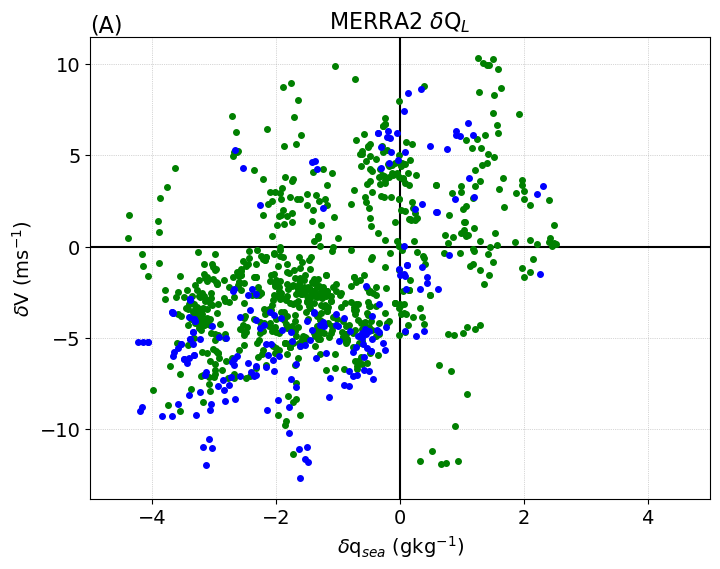

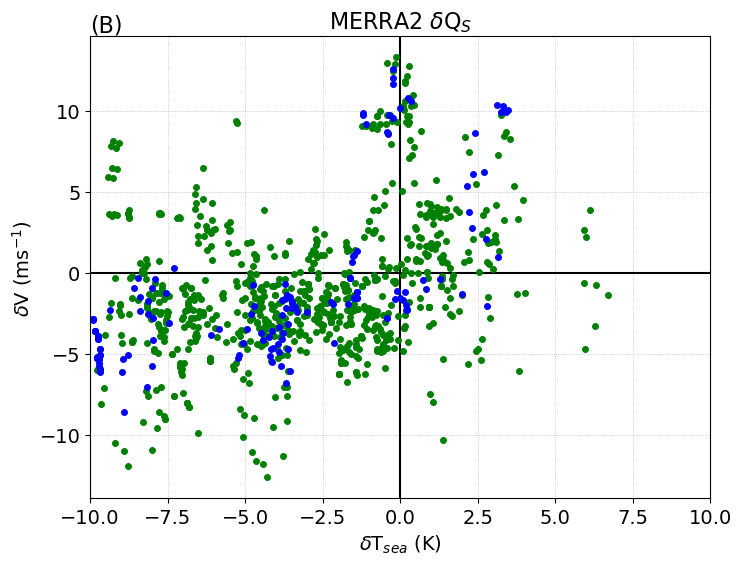

In [19]:
# SEA
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

qdiff = qs-qss
for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(Vdiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(Vdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(Vdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(Vdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(Vdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(Vdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(q2min,u2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(q2max,u2max,'.',c='g',markersize=8)
plt.plot(q3min,u3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(q3max,u3max,'.',c='b',markersize=8)

print(len(q2min))
print(len(QLdiff))

plt.text(0, 1.05, '(A)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('MERRA2 $\delta$Q$_L$', fontsize=16)
plt.xlabel('$\delta$q$_{sea}$ (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta$V (ms$^{-1}$)',fontsize=14)
plt.xlim([-5,5])
#plt.ylim([-15,15])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/A.png'
plt.savefig(filepath)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

Tdiff = SST - SSTs
for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(Vdiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(Vdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(Vdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(Vdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(Vdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(Vdiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(q2min,u2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(q2max,u2max,'.',c='g',markersize=8)
plt.plot(q3min,u3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(q3max,u3max,'.',c='b',markersize=8,label='>3$\sigma$')

plt.text(0, 1.05, '(B)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('MERRA2 $\delta$Q$_S$',fontsize=16)
plt.xlabel('$\delta$T$_{sea}$ (K)',fontsize=14)
plt.ylabel('$\delta$V (ms$^{-1}$)',fontsize=14)
plt.xlim([-10,10])
#plt.ylim([-15,15])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/B.png'
plt.savefig(filepath)

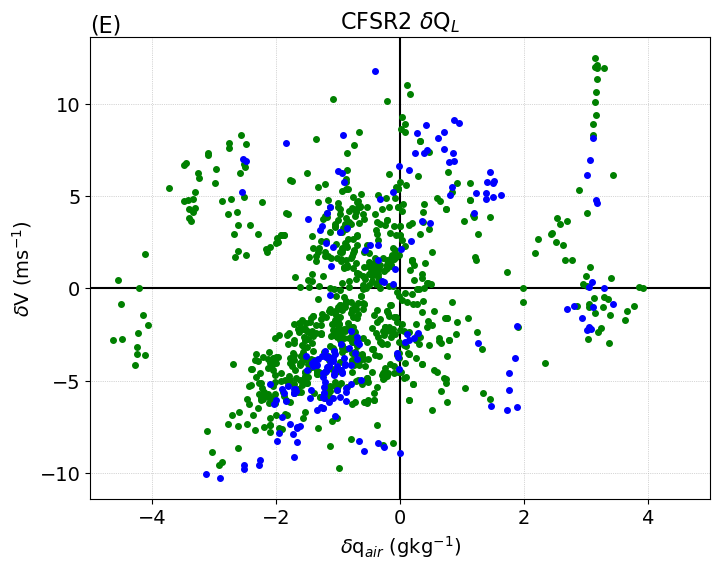

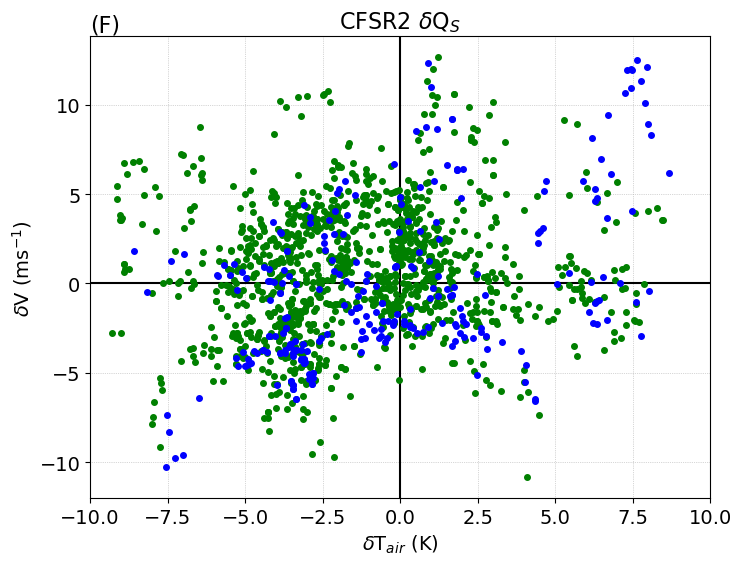

In [26]:
# AIR
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

qdiff = qa-qas
for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(Vdiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(Vdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(Vdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(Vdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(Vdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(Vdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(q2min,u2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(q2max,u2max,'.',c='g',markersize=8)
plt.plot(q3min,u3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(q3max,u3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(E)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('CFSR2 $\delta$Q$_L$', fontsize=16)
plt.xlabel('$\delta$q$_{air}$ (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta$V (ms$^{-1}$)',fontsize=14)
plt.xlim([-5,5])
#plt.ylim([-15,15])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/E.png'
plt.savefig(filepath)

plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

Tdiff = T - Ts
for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(Vdiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(Vdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(Vdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(Vdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(Vdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(Vdiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(q2min,u2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(q2max,u2max,'.',c='g',markersize=8)
plt.plot(q3min,u3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(q3max,u3max,'.',c='b',markersize=8,label='>3$\sigma$')

plt.text(0, 1.05, '(F)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('CFSR2 $\delta$Q$_S$',fontsize=16)
plt.xlabel('$\delta$T$_{air}$ (K)',fontsize=14)
plt.ylabel('$\delta$V (ms$^{-1}$)',fontsize=14)
plt.xlim([-10,10])
#plt.ylim([-15,15])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/F.png'
plt.savefig(filepath)

Correlation Coefficient: 0.17232657266502366
P-value: 1.5419864270994412e-192
Correlation Coefficient: -0.0777665888689636
P-value: 3.1342230174296465e-40
Correlation Coefficient: 0.27975737147110963
P-value: 0.0
Correlation Coefficient: -0.09313070050065839
P-value: 5.317236345292258e-57
Correlation Coefficient: 0.3596216975095692
P-value: 0.0
Correlation Coefficient: -0.060154668829068704
P-value: 1.0224618156362245e-24
Correlation Coefficient: 0.28793009650492685
P-value: 0.0
Correlation Coefficient: -0.19694522742610415
P-value: 5.3077705853027065e-252


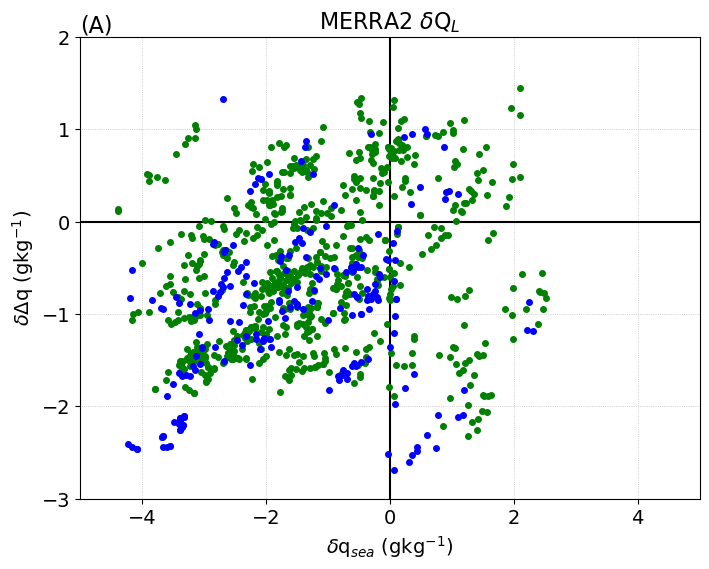

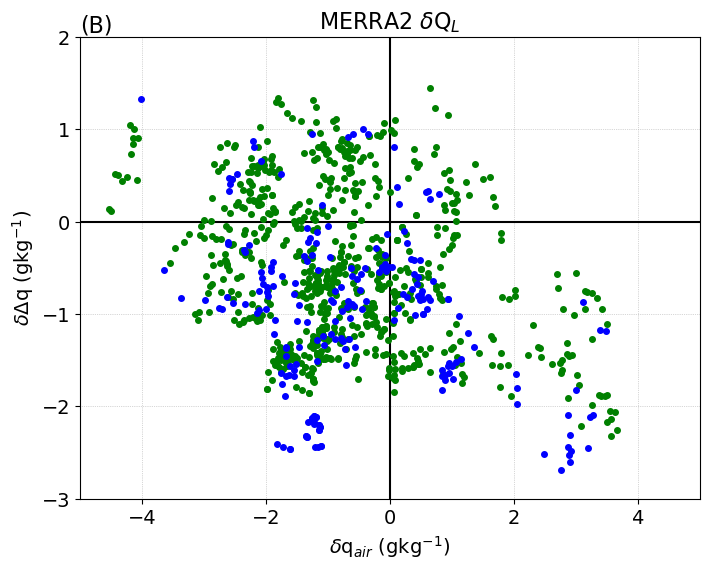

In [12]:
# MERRA2 deltaQ vs q components
# attempting to do for all files bc i'm too lazy to keep pressing go for different sections

# MERRA2
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2018.csv')
m = pd.read_csv('data/m2/m2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs
qdiff = (qs-qss) - (qa - qas)
qsdiff = qs-qss
qadiff = qa-qas
Tdiff = (SST-SSTs) - (T - Ts)
SSTdiff = SST-SSTs
Tadiff = T - Ts
Vdiff = V-Vs

# DELq vs qs
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(qsdiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(qsdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(qsdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(qsdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(qsdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(qsdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(A)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('MERRA2 $\delta$Q$_L$', fontsize=16)
plt.xlabel('$\delta$q$_{sea}$ (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta\Delta$q (gkg$^{-1}$)',fontsize=14)
plt.xlim([-5,5])
plt.ylim([-3,2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/A.png'
plt.savefig(filepath)

# DELq vs qa
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(qadiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(qadiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(qadiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(qadiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(qadiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(qadiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(B)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('MERRA2 $\delta$Q$_L$',fontsize=16)
plt.xlabel('$\delta$q$_{air}$ (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta\Delta$q (gkg$^{-1}$)',fontsize=14)
plt.ylim([-3,2])
plt.xlim([-5,5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/B.png'
plt.savefig(filepath)

# correlation coefficients

# Calculate the correlation coefficient and p-value for flux
correlation_coefficient, p_value = pearsonr(qsdiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(qadiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(SSTdiff, QSdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(Tadiff, QSdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Calculate the correlation coefficient and p-value for flux
correlation_coefficient, p_value = pearsonr(qsdiff, qdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(qadiff, qdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(SSTdiff, Tdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(Tadiff, Tdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Correlation Coefficient: 0.5664689931585399
Correlation Coefficient: -0.08016441125779468
Correlation Coefficient: 0.15054361283300574
Correlation Coefficient: 0.5664689931585399


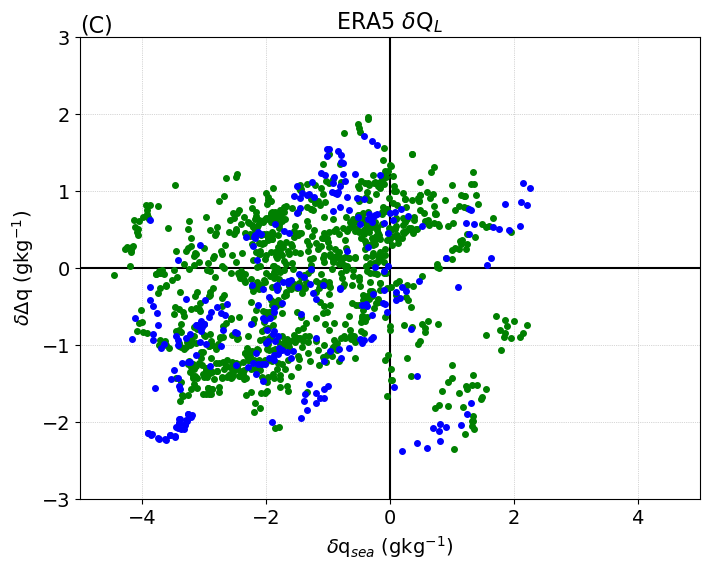

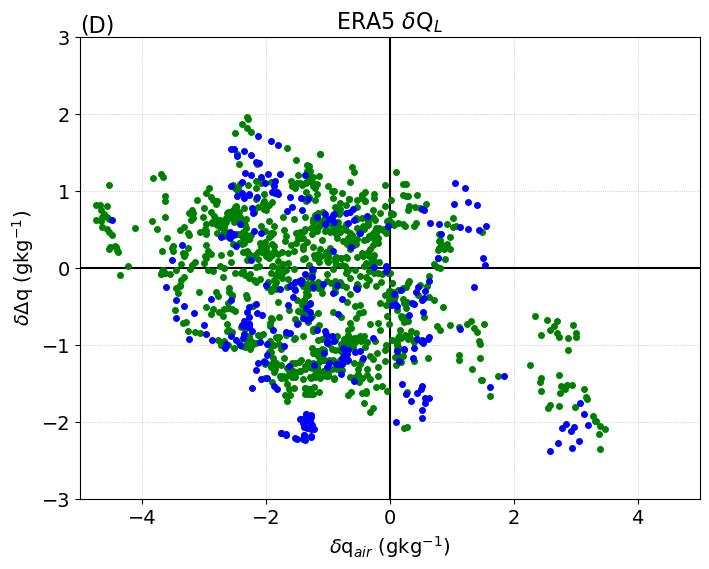

In [2]:
# ERA5 deltaQ vs q components
# attempting to do for all files bc i'm too lazy to keep pressing go for different sections

# ERA5
# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2017.csv')
m = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2018.csv')
m = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs
qdiff = (qs-qss) - (qa - qas)
qsdiff = qs-qss
qadiff = qa-qas
Tdiff = (SST-SSTs) - (T - Ts)
SSTdiff = SST-SSTs
Tadiff = T - Ts
Vdiff = V-Vs

# DELq vs qs
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(qsdiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(qsdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(qsdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(qsdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(qsdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(qsdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(C)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('ERA5 $\delta$Q$_L$', fontsize=16)
plt.xlabel('$\delta$q$_{sea}$ (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta\Delta$q (gkg$^{-1}$)',fontsize=14)
plt.xlim([-5,5])
plt.ylim([-3,3])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/C.png'
plt.savefig(filepath)

# DELq vs qa
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(qadiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(qadiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(qadiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(qadiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(qadiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(qadiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(D)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('ERA5 $\delta$Q$_L$',fontsize=16)
plt.xlabel('$\delta$q$_{air}$ (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta\Delta$q (gkg$^{-1}$)',fontsize=14)
plt.xlim([-5,5])
plt.ylim([-3,3])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/D.png'
plt.savefig(filepath)

# correlation coefficients

# # Calculate the correlation coefficient and p-value for flux
# correlation_coefficient, p_value = pearsonr(qsdiff, QLdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")

# correlation_coefficient, p_value = pearsonr(qadiff, QLdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")

# correlation_coefficient, p_value = pearsonr(SSTdiff, QSdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")

# correlation_coefficient, p_value = pearsonr(Tadiff, QSdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")

# # Calculate the correlation coefficient and p-value for flux
# correlation_coefficient, p_value = pearsonr(qsdiff, qdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")

# correlation_coefficient, p_value = pearsonr(qadiff, qdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")

# correlation_coefficient, p_value = pearsonr(SSTdiff, Tdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")

# correlation_coefficient, p_value = pearsonr(Tadiff, Tdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")

# correlation_coefficient, p_value = pearsonr(Tdiff, QSdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")

# correlation_coefficient, p_value = pearsonr(Tadiff, QSdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")

# correlation_coefficient, p_value = pearsonr(SSTdiff, QSdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")

# correlation_coefficient, p_value = pearsonr(SSTdiff-Tadiff, QSdiff)
# print(f"Correlation Coefficient: {correlation_coefficient}")

correlation_coefficient, p_value = pearsonr(qdiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")

correlation_coefficient, p_value = pearsonr(qadiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")

correlation_coefficient, p_value = pearsonr(qsdiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")

correlation_coefficient, p_value = pearsonr(qsdiff-qadiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.18612891525143288
P-value: 4.4986835882206295e-201
Correlation Coefficient: -0.07298854093419874
P-value: 5.187339056203617e-32
Correlation Coefficient: 0.3101638096144625
P-value: 0.0
Correlation Coefficient: -0.07216913307354059
P-value: 2.4767483063329373e-31
Correlation Coefficient: 0.37508412722905077
P-value: 0.0
Correlation Coefficient: -0.03283939036113442
P-value: 1.2052482726705317e-07
Correlation Coefficient: 0.3865462085004516
P-value: 0.0
Correlation Coefficient: -0.10025294591290237
P-value: 5.546839745042562e-59


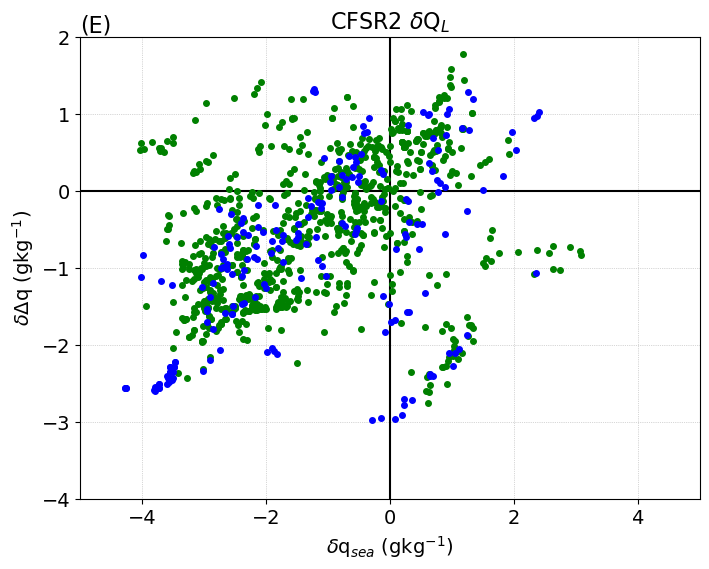

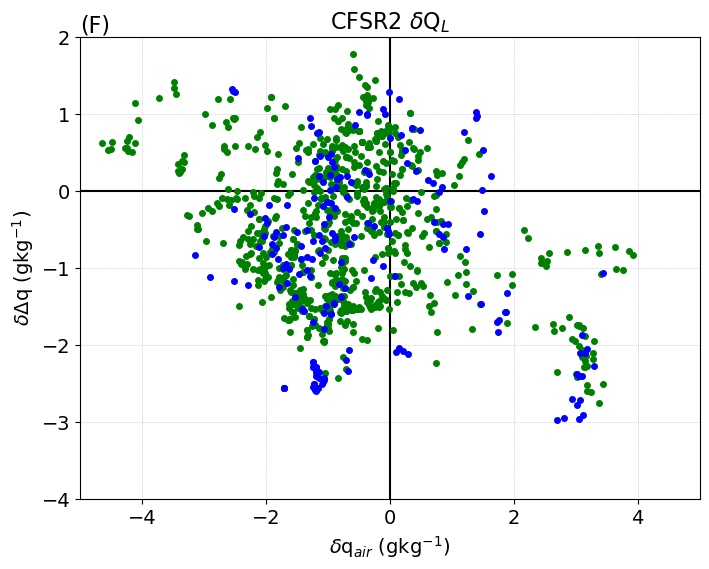

In [15]:
# CFSR2 deltaQ vs q components
# attempting to do for all files bc i'm too lazy to keep pressing go for different sections

# CFSR2
# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2017.csv')
m = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2018.csv')
m = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2019.csv')
m = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs
qdiff = (qs-qss) - (qa - qas)
qsdiff = qs-qss
qadiff = qa-qas
Tdiff = (SST-SSTs) - (T - Ts)
SSTdiff = SST-SSTs
Tadiff = T - Ts
Vdiff = V-Vs

# DELq vs qs
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(qsdiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(qsdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(qsdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(qsdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(qsdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(qsdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(E)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('CFSR2 $\delta$Q$_L$', fontsize=16)
plt.xlabel('$\delta$q$_{sea}$ (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta\Delta$q (gkg$^{-1}$)',fontsize=14)
plt.xlim([-5,5])
plt.ylim([-4,2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/E.png'
plt.savefig(filepath)

# DELq vs qa
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QLdiff):
    if flux>stdQL*3:
        q3max.append(qdiff[idx])
        u3max.append(qadiff[idx])
        max3.append(flux)
    elif flux<stdQL*-3:
        q3min.append(qdiff[idx])
        u3min.append(qadiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQL*3,flux>stdQL*2):
        q2max.append(qdiff[idx])
        u2max.append(qadiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQL*-3,flux<stdQL*-2):
        q2min.append(qdiff[idx])
        u2min.append(qadiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQL*2,flux>stdQL):
        q1max.append(qdiff[idx])
        u1max.append(qadiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQL*-2,flux<-1*stdQL):
        q1min.append(qdiff[idx])
        u1min.append(qadiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(F)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('CFSR2 $\delta$Q$_L$',fontsize=16)
plt.xlabel('$\delta$q$_{air}$ (gkg$^{-1}$)',fontsize=14)
plt.ylabel('$\delta\Delta$q (gkg$^{-1}$)',fontsize=14)
plt.xlim([-5,5])
plt.ylim([-4,2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/F.png'
plt.savefig(filepath)

# correlation coefficients

# Calculate the correlation coefficient and p-value for flux
correlation_coefficient, p_value = pearsonr(qsdiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(qadiff, QLdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(SSTdiff, QSdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(Tadiff, QSdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Calculate the correlation coefficient and p-value for flux
correlation_coefficient, p_value = pearsonr(qsdiff, qdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(qadiff, qdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(SSTdiff, Tdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

correlation_coefficient, p_value = pearsonr(Tadiff, Tdiff)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


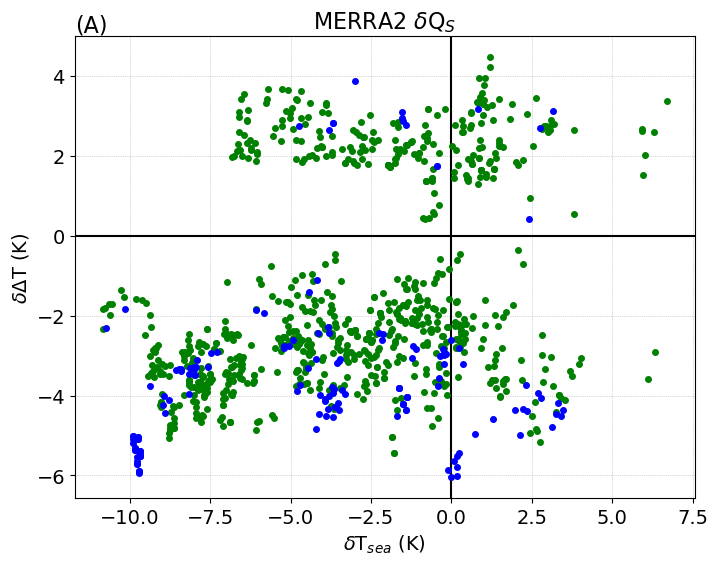

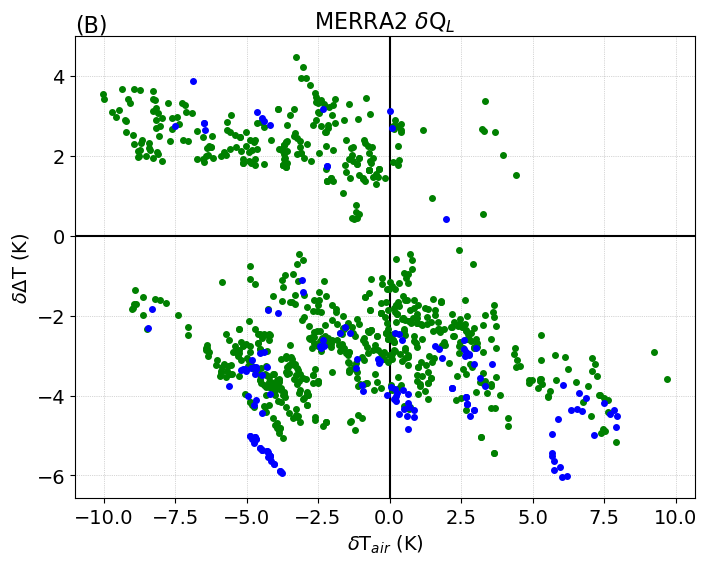

In [20]:
# MERRA2 deltaT vs T components
# attempting to do for all files bc i'm too lazy to keep pressing go for different sections

# MERRA2
# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2018.csv')
m = pd.read_csv('data/m2/m2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs
qdiff = (qs-qss) - (qa - qas)
qsdiff = qs-qss
qadiff = qa-qas
Tdiff = (SST-SSTs) - (T - Ts)
SSTdiff = SST-SSTs
Tadiff = T - Ts
Vdiff = V-Vs

# DELq vs qs
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(SSTdiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(SSTdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(SSTdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(SSTdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(SSTdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(SSTdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(A)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('MERRA2 $\delta$Q$_S$', fontsize=16)
plt.xlabel('$\delta$T$_{sea}$ (K)',fontsize=14)
plt.ylabel('$\delta\Delta$T (K)',fontsize=14)
# plt.xlim([-5,5])
# plt.ylim([-3,2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/A.png'
plt.savefig(filepath)

# DELq vs qa
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(Tadiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(Tadiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(Tadiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(Tadiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(Tadiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(Tadiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(B)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('MERRA2 $\delta$Q$_L$',fontsize=16)
plt.xlabel('$\delta$T$_{air}$ (K)',fontsize=14)
plt.ylabel('$\delta\Delta$T (K)',fontsize=14)
# plt.ylim([-3,2])
# plt.xlim([-5,5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/B.png'
plt.savefig(filepath)

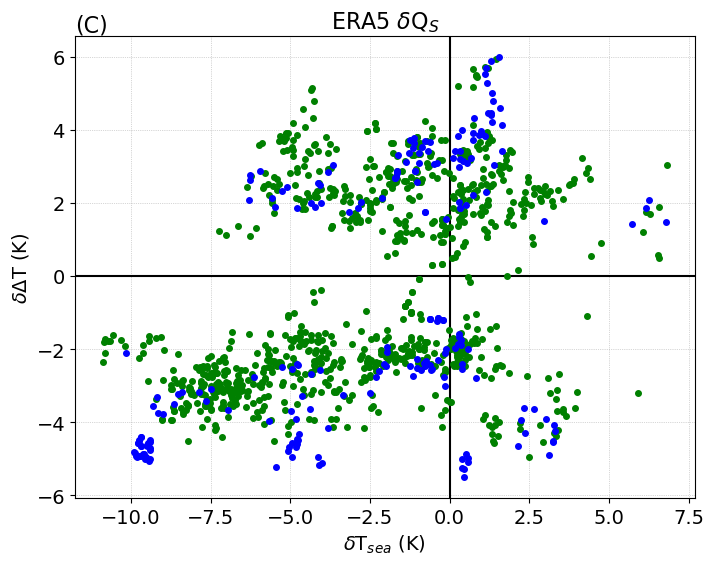

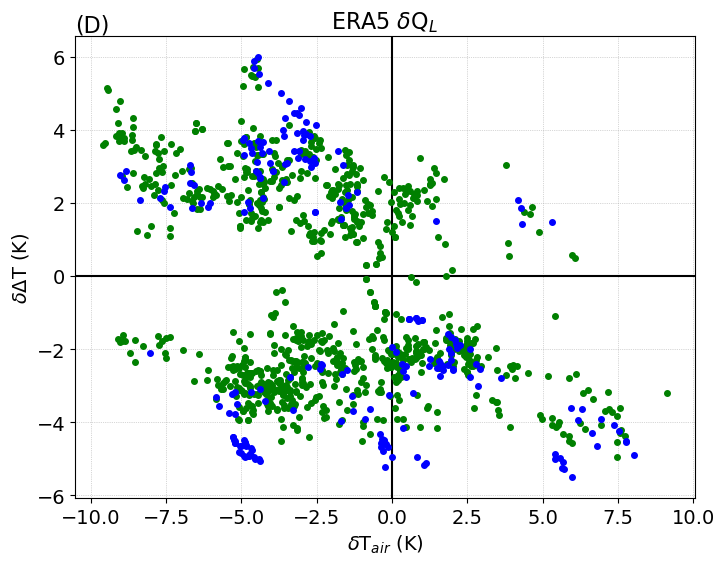

In [21]:
# ERA5 deltaT vs T components
# attempting to do for all files bc i'm too lazy to keep pressing go for different sections

# ERA5
# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2017.csv')
m = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2018.csv')
m = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs
qdiff = (qs-qss) - (qa - qas)
qsdiff = qs-qss
qadiff = qa-qas
Tdiff = (SST-SSTs) - (T - Ts)
SSTdiff = SST-SSTs
Tadiff = T - Ts
Vdiff = V-Vs

# DELq vs qs
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(SSTdiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(SSTdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(SSTdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(SSTdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(SSTdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(SSTdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(C)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('ERA5 $\delta$Q$_S$', fontsize=16)
plt.xlabel('$\delta$T$_{sea}$ (K)',fontsize=14)
plt.ylabel('$\delta\Delta$T (K)',fontsize=14)
# plt.xlim([-5,5])
# plt.ylim([-3,2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/C.png'
plt.savefig(filepath)

# DELq vs qa
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(Tadiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(Tadiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(Tadiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(Tadiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(Tadiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(Tadiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(D)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('ERA5 $\delta$Q$_L$',fontsize=16)
plt.xlabel('$\delta$T$_{air}$ (K)',fontsize=14)
plt.ylabel('$\delta\Delta$T (K)',fontsize=14)
# plt.ylim([-3,2])
# plt.xlim([-5,5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/D.png'
plt.savefig(filepath)

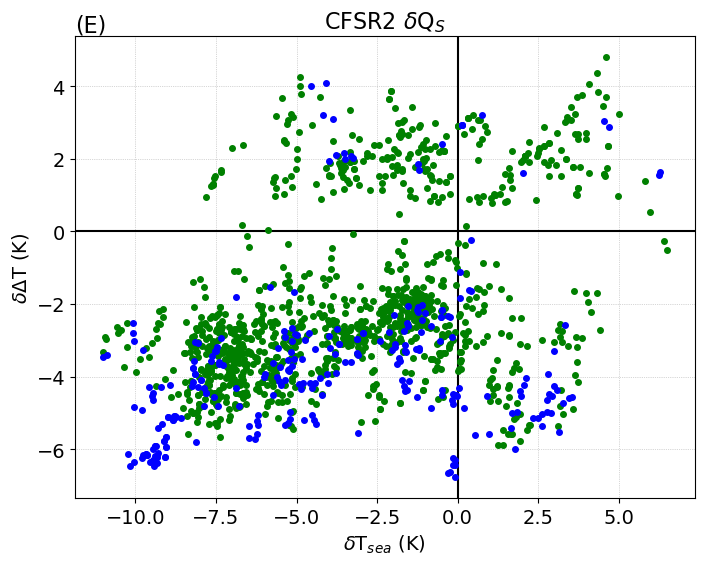

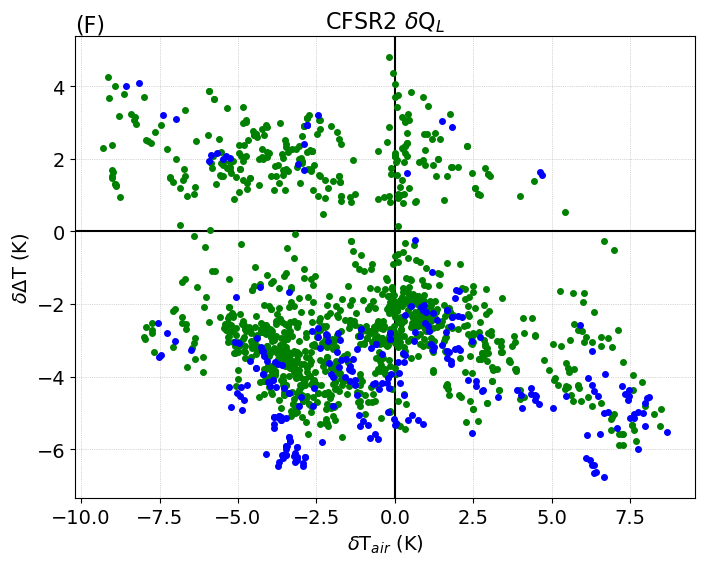

In [22]:
# ERA5 deltaT vs T components
# attempting to do for all files bc i'm too lazy to keep pressing go for different sections

# ERA5
# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2017.csv')
m = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2018.csv')
m = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2019.csv')
m = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)

QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)

qs = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qa = np.concatenate((qa2017,qa2018,qa2019),axis=None)

qss = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qas = np.concatenate((qas2017,qas2018,qas2019),axis=None)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)

SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)

meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)

QLdiff = QL-QLs
QSdiff = QS-QSs
qdiff = (qs-qss) - (qa - qas)
qsdiff = qs-qss
qadiff = qa-qas
Tdiff = (SST-SSTs) - (T - Ts)
SSTdiff = SST-SSTs
Tadiff = T - Ts
Vdiff = V-Vs

# DELq vs qs
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(SSTdiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(SSTdiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(SSTdiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(SSTdiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(SSTdiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(SSTdiff[idx])
        min1.append(flux)

plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(E)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('CFSR2 $\delta$Q$_S$', fontsize=16)
plt.xlabel('$\delta$T$_{sea}$ (K)',fontsize=14)
plt.ylabel('$\delta\Delta$T (K)',fontsize=14)
# plt.xlim([-5,5])
# plt.ylim([-3,2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/E.png'
plt.savefig(filepath)

# DELq vs qa
plt.figure(figsize=(8,6))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

q3min = []
q3max = []
q2max = []
q2min = []
q1max = []
q1min = []

u3min = []
u3max = []
u2max = []
u2min = []
u1max = []
u1min = []

max3 = []
min3 = []
max2 = []
min2 = []
max1 = []
min1 = []

for idx, flux in enumerate(QSdiff):
    if flux>stdQS*3:
        q3max.append(Tdiff[idx])
        u3max.append(Tadiff[idx])
        max3.append(flux)
    elif flux<stdQS*-3:
        q3min.append(Tdiff[idx])
        u3min.append(Tadiff[idx])
        min3.append(flux)
    elif np.logical_and(flux<=stdQS*3,flux>stdQS*2):
        q2max.append(Tdiff[idx])
        u2max.append(Tadiff[idx])
        max2.append(flux)
    elif np.logical_and(flux>=stdQS*-3,flux<stdQS*-2):
        q2min.append(Tdiff[idx])
        u2min.append(Tadiff[idx])
        min2.append(flux)
    elif np.logical_and(flux<=stdQS*2,flux>stdQS):
        q1max.append(Tdiff[idx])
        u1max.append(Tadiff[idx])
        max1.append(flux)
    elif np.logical_and(flux>=stdQS*-2,flux<-1*stdQS):
        q1min.append(Tdiff[idx])
        u1min.append(Tadiff[idx])
        min1.append(flux)
        
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.plot(u2min,q2min,'.',c='g',markersize=8,label='2$\sigma$ to 3$\sigma$')
plt.plot(u2max,q2max,'.',c='g',markersize=8)
plt.plot(u3min,q3min,'.',c='b',markersize=8,label='>3$\sigma$')
plt.plot(u3max,q3max,'.',c='b',markersize=8)

plt.text(0, 1.05, '(F)', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.title('CFSR2 $\delta$Q$_L$',fontsize=16)
plt.xlabel('$\delta$T$_{air}$ (K)',fontsize=14)
plt.ylabel('$\delta\Delta$T (K)',fontsize=14)
# plt.ylim([-3,2])
# plt.xlim([-5,5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
filepath = savepath+'/F.png'
plt.savefig(filepath)